In [158]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
from scipy.stats import pointbiserialr



In [119]:
df = pd.read_csv('insurance_claims.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [120]:
df['incident_date'].value_counts()

incident_date
2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-01-10    24
2015-02-04    24
2015-01-24    24
2015-01-19    23
2015-01-08    22
2015-01-13    21
2015-01-30    21
2015-02-12    20
2015-02-22    20
2015-01-31    20
2015-02-06    20
2015-02-21    19
2015-01-01    19
2015-02-23    19
2015-01-12    19
2015-01-14    19
2015-01-21    19
2015-01-03    18
2015-02-14    18
2015-02-01    18
2015-02-28    18
2015-01-20    18
2015-01-18    18
2015-02-25    18
2015-01-06    17
2015-01-09    17
2015-02-08    17
2015-02-24    17
2015-02-26    17
2015-02-13    16
2015-02-15    16
2015-02-16    16
2015-02-05    16
2015-01-16    16
2015-01-17    15
2015-02-18    15
2015-01-28    15
2015-01-15    15
2015-01-22    14
2015-02-20    14
2015-02-27    14
2015-01-23    13
2015-02-03    13
2015-01-27    13
2015-02-09    13
2015-01-04    12
2015-03-01    12
2015-01-26    11
2015-01-29    11
2015-01-02    11
2015-02-19    10
2015-02-11    10
2015-02-10    10
2015-02-07    10
2015-01-25    10


In [121]:
#Inspecting data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [122]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [123]:
df.duplicated().sum()

0

Univariate Analysis

In [124]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Missing values in 'fraud_reported': 0


Frequency of each category in 'fraud_reported':
fraud_reported
N    753
Y    247
Name: count, dtype: int64


Percentage distribution of 'fraud_reported':
fraud_reported
N    75.3
Y    24.7
Name: proportion, dtype: float64




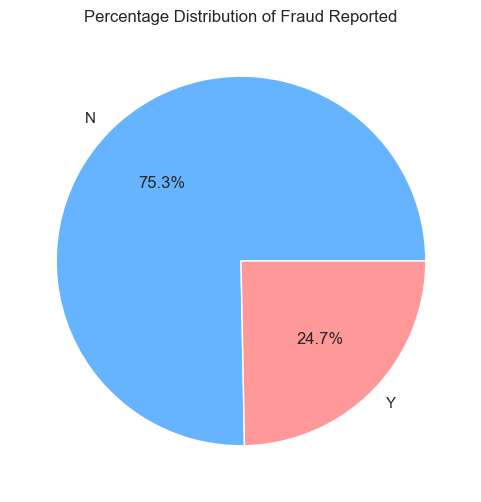

Interpretation:
The target variable 'fraud_reported' has 247 instances of fraud reported and 753 instances where fraud was not reported.
This indicates that 24.7% of the claims are fraudulent, and 75.3% are non-fraudulent.


In [125]:
#exploring Target Variable


# Missing Value Analysis
missing_values = df['fraud_reported'].isnull().sum()
print(f"Missing values in 'fraud_reported': {missing_values}")
print("\n")

# Frequency Distribution
value_counts = df['fraud_reported'].value_counts()
print("Frequency of each category in 'fraud_reported':")
print(value_counts)
print("\n")

# Percentage Distribution
percentage_distribution = (df['fraud_reported'].value_counts(normalize=True) * 100).round(2)
print("Percentage distribution of 'fraud_reported':")
print(percentage_distribution)
print("\n")



# Pie Chart Visualization
plt.figure(figsize=(6, 6))
df['fraud_reported'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Percentage Distribution of Fraud Reported')
plt.ylabel('')
plt.show()

# Interpretation 
print("Interpretation:")
print(f"The target variable 'fraud_reported' has {value_counts['Y']} instances of fraud reported and {value_counts['N']} instances where fraud was not reported.")
print(f"This indicates that {percentage_distribution['Y']}% of the claims are fraudulent, and {percentage_distribution['N']}% are non-fraudulent.")



## Univariate Analysis on Numerical columns

**Descriptive Statistics:** Provides a snapshot of the data's central tendency and dispersion.

**Outlier Detection:** Helps identify unusual data points that may need investigation or treatment.

**Shapiro's Normality Test:** Determines if the data distribution deviates from normality, informing the choice of statistical tests and models.

**Skewness:** Knowing the skewness helps in choosing the appropriate measure of central tendency for data interpretation.

*Ensure that statistical assumptions are met.*

Decide on appropriate statistical tests and models to be applied

Improve the validity and reliability of analytical results.

**Positive Skew:** The mean is greater than the median.
**Negative Skew:** The mean is less than the median.

**Kurtosis:** provides insights into the likelihood of extreme outcomes, which is essential for accurate data interpretation.

**Visualizations:** Offer intuitive insights into the data distribution, variability, and potential anomalies.

In [126]:
# importing function for the univariate analysis
from utils.analysis import univariate_analysis

#### Age Column


Analyzing 'age':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


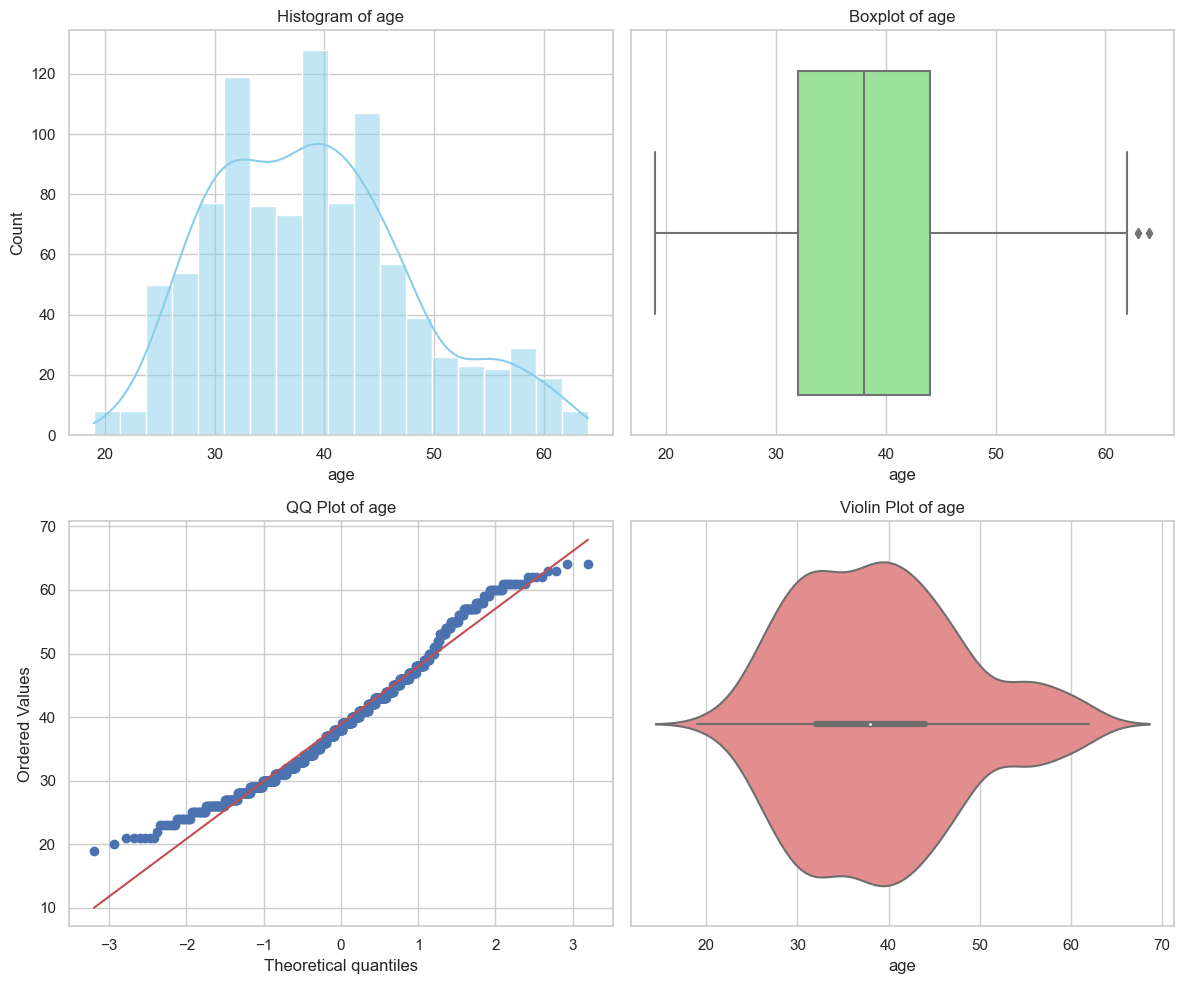

                                                      Value
count                                                  1000
mean                                                 38.948
median                                                 38.0
mode                                                   [43]
std_dev                                            9.140287
variance                                          83.544841
min                                                      19
max                                                      64
range                                                    45
skewness                                           0.478988
kurtosis                                          -0.260255
quantiles               {0.25: 32.0, 0.5: 38.0, 0.75: 44.0}
num_outliers                                              4
outlier_values                             [64, 63, 64, 63]
normality_test                                 Shapiro-Wilk
normality_pvalue                        

In [127]:
#Applying the function to columns

univariate_analysis(df, cols=['age'], output_dir=None)

#### Months_as_customer


Analyzing 'months_as_customer':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


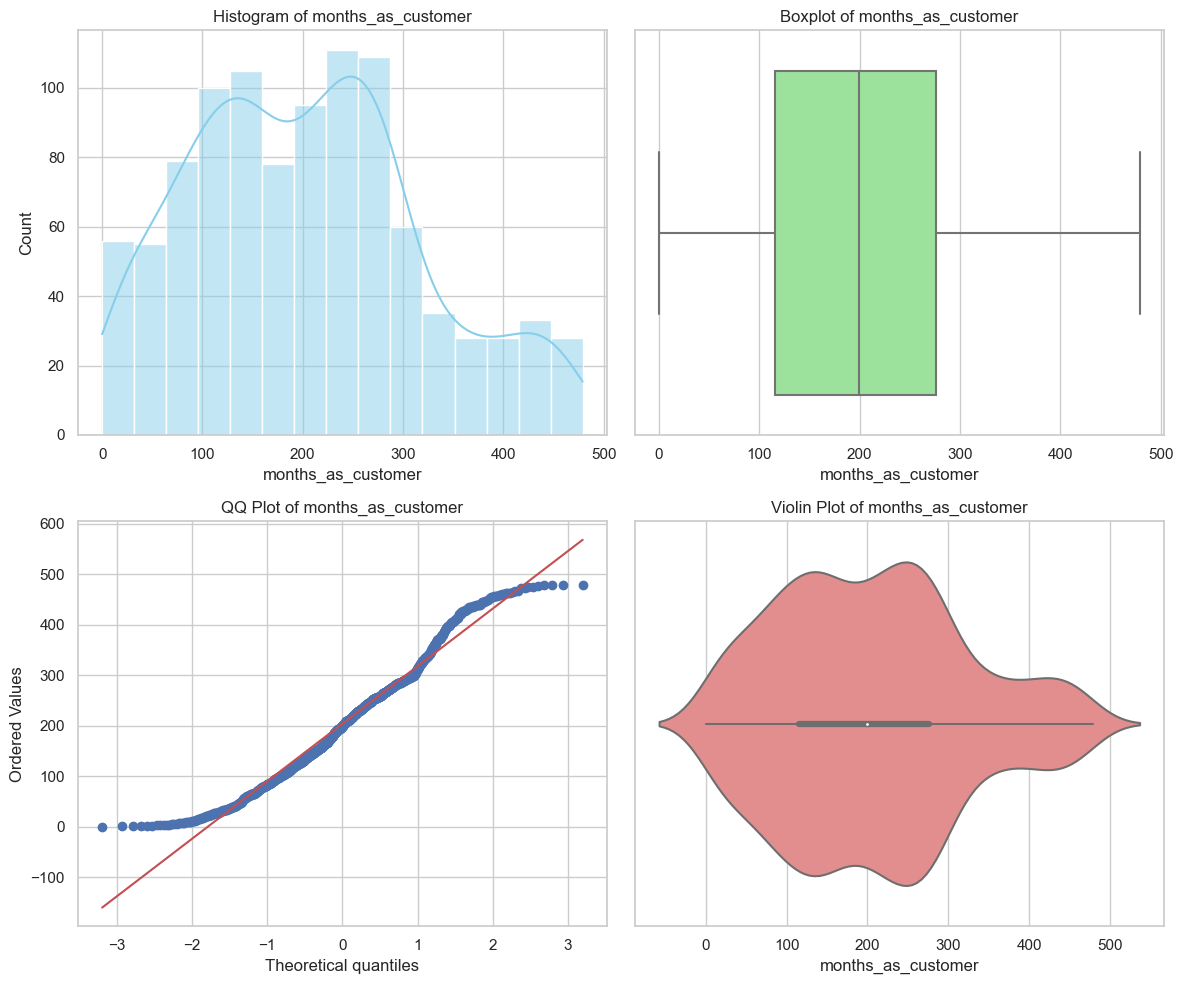

                                                           Value
count                                                       1000
mean                                                     203.954
median                                                     199.5
mode                                                       [194]
std_dev                                               115.113174
variance                                            13251.042927
min                                                            0
max                                                          479
range                                                        479
skewness                                                0.362177
kurtosis                                               -0.485428
quantiles               {0.25: 115.75, 0.5: 199.5, 0.75: 276.25}
num_outliers                                                   0
outlier_values                                                []
normality_test           

In [128]:
univariate_analysis(df, cols=['months_as_customer'], output_dir=None)

#### Policy_Number


Analyzing 'policy_number':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


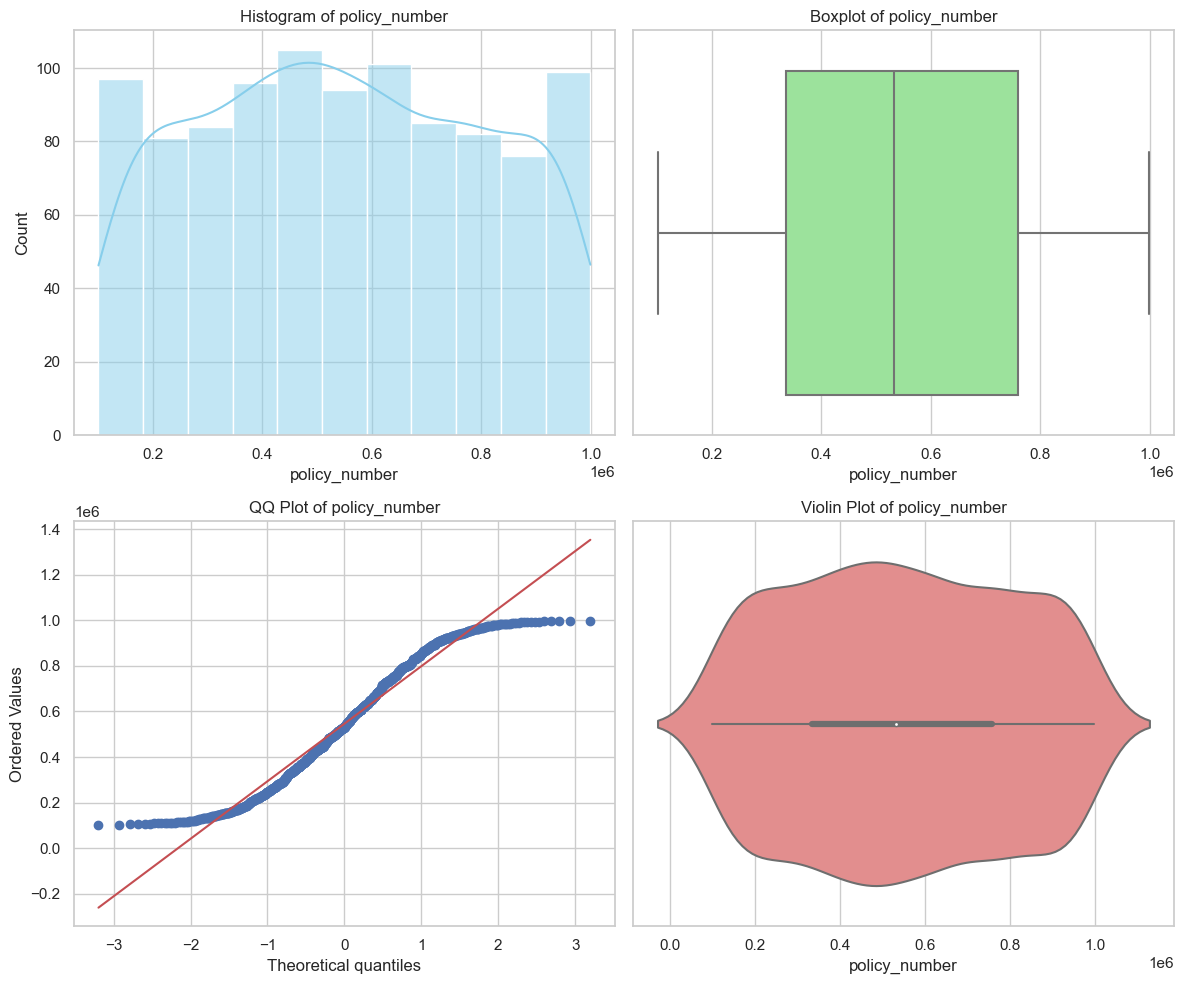

                                                                    Value
count                                                                1000
mean                                                           546238.648
median                                                           533135.0
mode                    [100804, 101421, 104594, 106186, 106873, 10718...
std_dev                                                     257063.005276
variance                                               66081388681.315422
min                                                                100804
max                                                                999435
range                                                              898631
skewness                                                         0.038991
kurtosis                                                        -1.132638
quantiles               {0.25: 335980.25, 0.5: 533135.0, 0.75: 759099.75}
num_outliers                          

In [129]:
univariate_analysis(df, cols=['policy_number'], output_dir=None)

#### Policy_deductable Column 


Analyzing 'policy_deductable':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


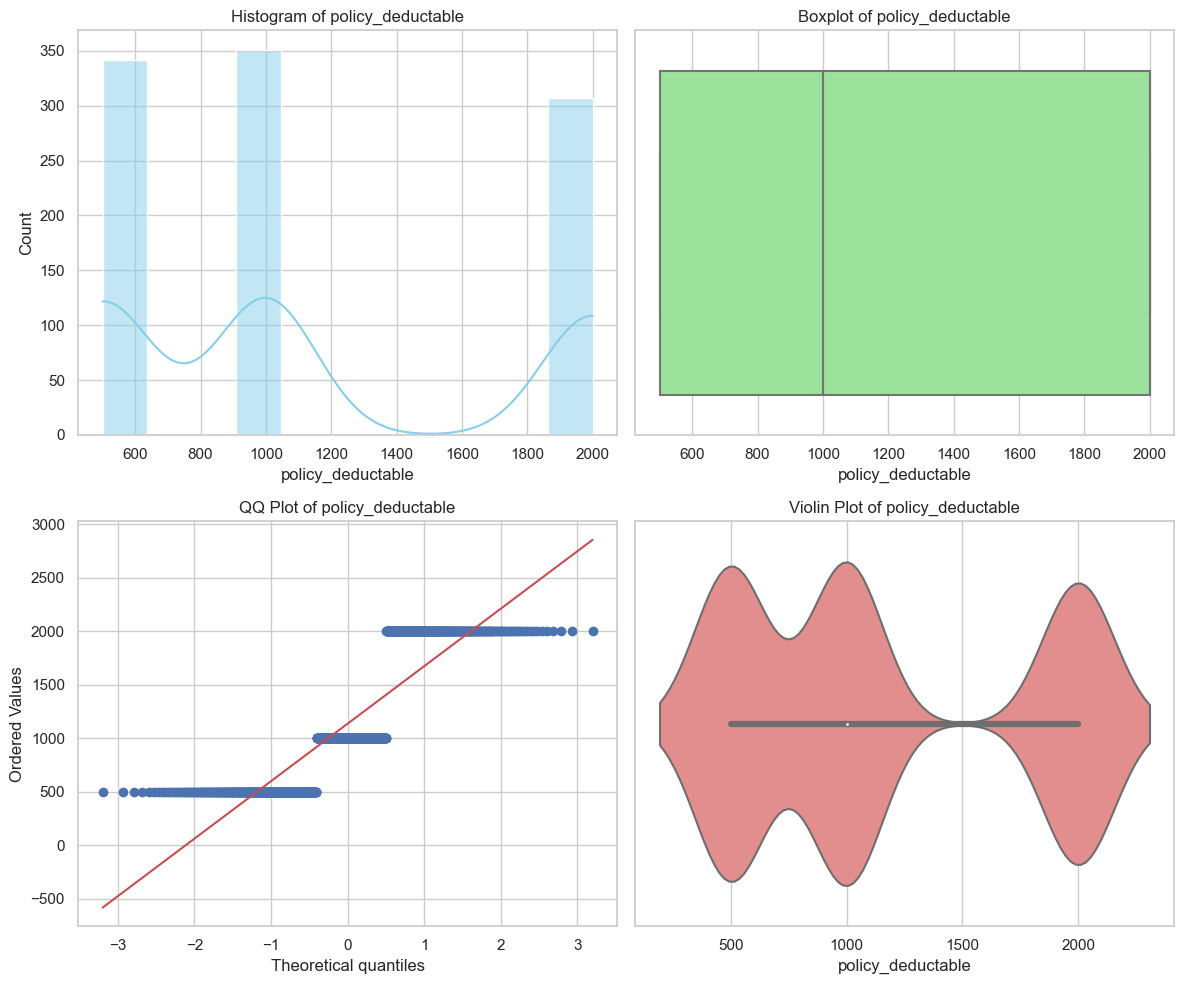

                                                           Value
count                                                       1000
mean                                                      1136.0
median                                                    1000.0
mode                                                      [1000]
std_dev                                               611.864673
variance                                           374378.378378
min                                                          500
max                                                         2000
range                                                       1500
skewness                                                0.477887
kurtosis                                               -1.376943
quantiles               {0.25: 500.0, 0.5: 1000.0, 0.75: 2000.0}
num_outliers                                                   0
outlier_values                                                []
normality_test           

In [130]:
univariate_analysis(df, cols=['policy_deductable'], output_dir=None)

#### Umbrella_limit column


Analyzing 'umbrella_limit':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


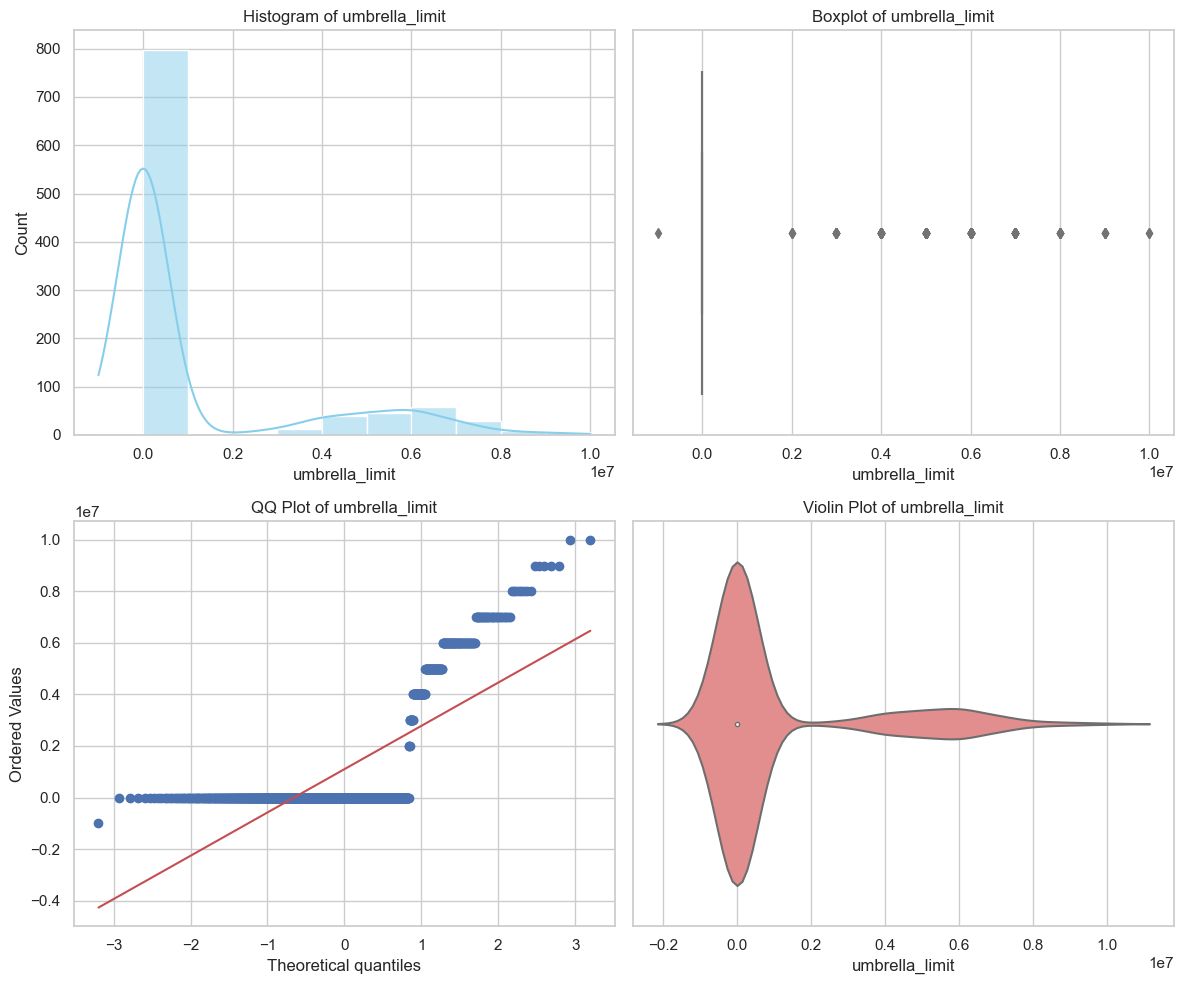

                                                                    Value
count                                                                1000
mean                                                            1101000.0
median                                                                0.0
mode                                                                  [0]
std_dev                                                    2297406.598118
variance                                             5278077077077.077148
min                                                              -1000000
max                                                              10000000
range                                                            11000000
skewness                                                         1.806712
kurtosis                                                         1.792077
quantiles                                {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}
num_outliers                          

In [131]:
univariate_analysis(df, cols=['umbrella_limit'], output_dir=None)

#### Policy_annual_premium column


Analyzing 'policy_annual_premium':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


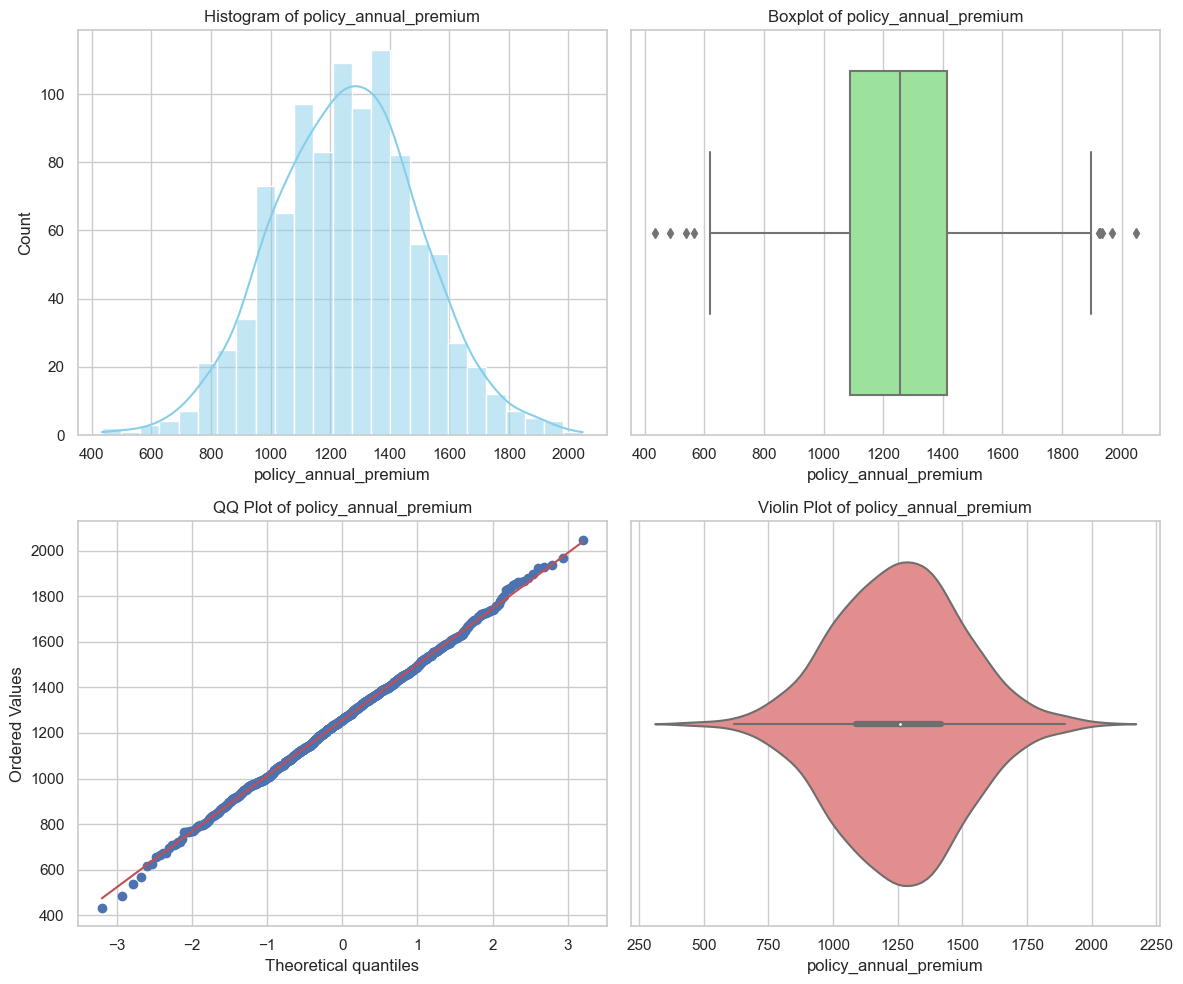

                                                                    Value
count                                                                1000
mean                                                           1256.40615
median                                                             1257.2
mode                    [1073.83, 1074.07, 1215.36, 1281.25, 1362.87, ...
std_dev                                                        244.167395
variance                                                     59617.716762
min                                                                433.33
max                                                               2047.59
range                                                             1614.26
skewness                                                         0.004402
kurtosis                                                         0.073889
quantiles               {0.25: 1089.6075, 0.5: 1257.1999999999998, 0.7...
num_outliers                          

In [132]:
univariate_analysis(df, cols=['policy_annual_premium'], output_dir=None)

#### Capital-gains column


Analyzing 'capital-gains':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


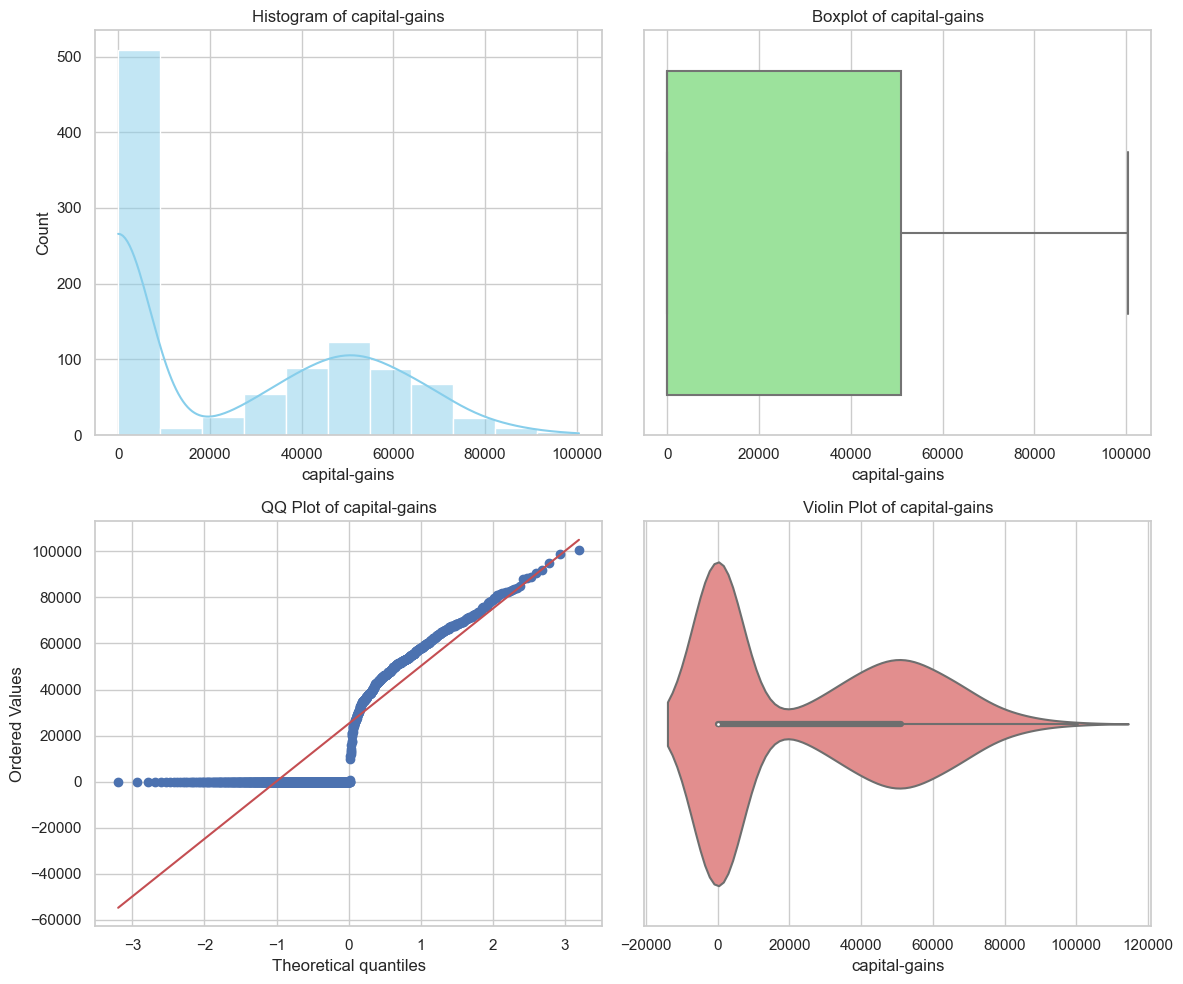

                                                       Value
count                                                   1000
mean                                                 25126.1
median                                                   0.0
mode                                                     [0]
std_dev                                         27872.187708
variance                                    776858847.637633
min                                                        0
max                                                   100500
range                                                 100500
skewness                                             0.47885
kurtosis                                           -1.276704
quantiles               {0.25: 0.0, 0.5: 0.0, 0.75: 51025.0}
num_outliers                                               0
outlier_values                                            []
normality_test                                  Shapiro-Wilk
normality_pvalue        

In [133]:
univariate_analysis(df, cols=['capital-gains'], output_dir=None)

#### Capital-loss column

In [134]:
univariate_analysis(df, cols=['capital-loss'], output_dir=None)


Analyzing 'capital-loss':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                                                             Value
count                                                         1000
mean                                                      -26793.7
median                                                    -23250.0
mode                                                           [0]
std_dev                                               28104.096686
variance                                          789840250.560544
min                                                        -111100
max                                                              0
range                                                       111100
skewness                                                 -0.391472
kurtosis                                                 -1.313875
quantiles               {0.25: -51500.0, 0.5: -23250.0, 0.75: 0.0}
num_outliers                                                     0
outlier_values                                                

#### Incident_hour_of_the_day column


Analyzing 'incident_hour_of_the_day':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


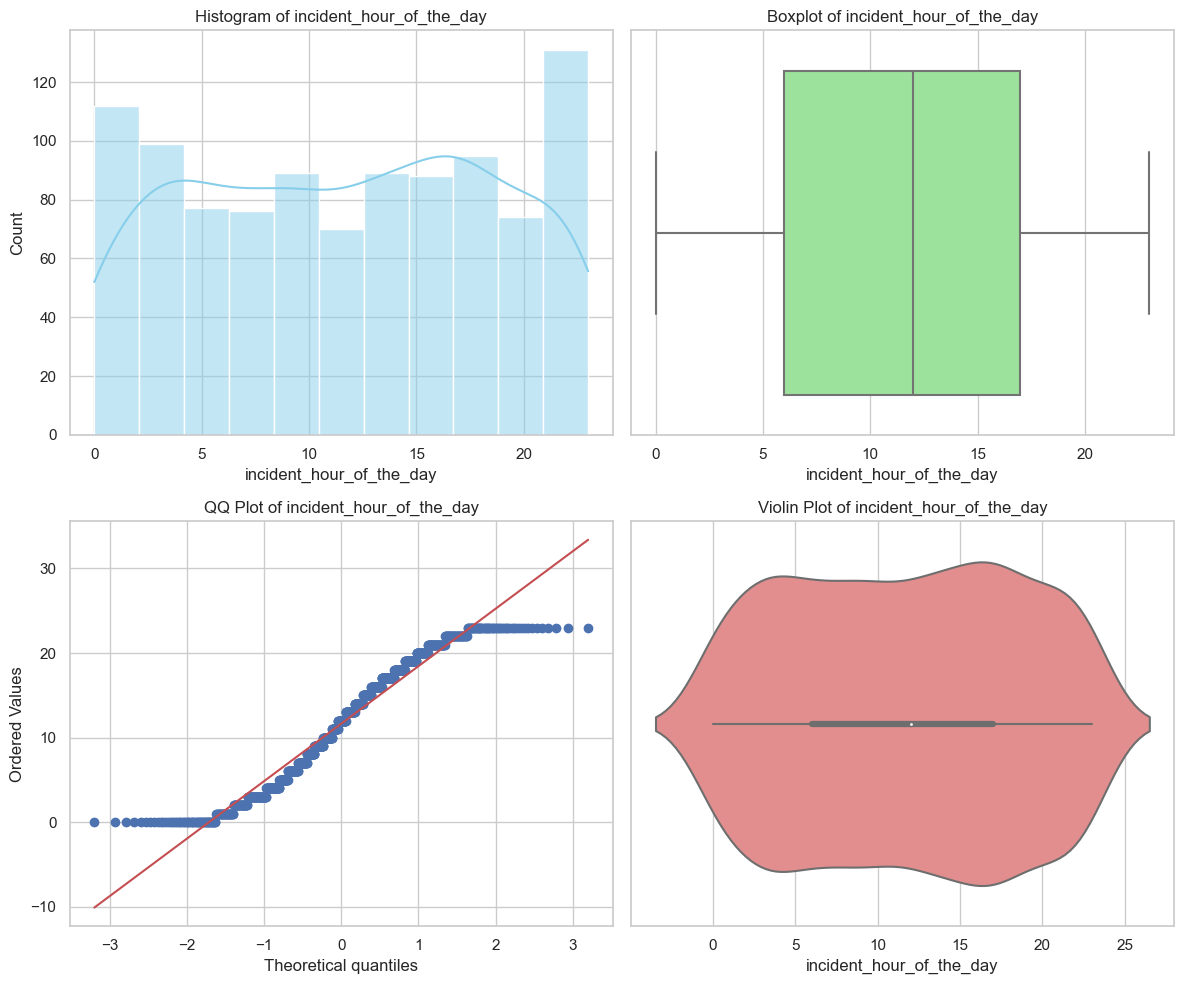

                                                     Value
count                                                 1000
mean                                                11.644
median                                                12.0
mode                                                  [17]
std_dev                                           6.951373
variance                                         48.321586
min                                                      0
max                                                     23
range                                                   23
skewness                                         -0.035584
kurtosis                                          -1.19294
quantiles               {0.25: 6.0, 0.5: 12.0, 0.75: 17.0}
num_outliers                                             0
outlier_values                                          []
normality_test                                Shapiro-Wilk
normality_pvalue                                       0

In [135]:
univariate_analysis(df, cols=['incident_hour_of_the_day'], output_dir=None)

#### Number_of_vehicles_involved Column 

In [136]:
univariate_analysis(df, cols=['number_of_vehicles_involved'], output_dir=None)


Analyzing 'number_of_vehicles_involved':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                                                   Value
count                                               1000
mean                                               1.839
median                                               1.0
mode                                                 [1]
std_dev                                          1.01888
variance                                        1.038117
min                                                    1
max                                                    4
range                                                  3
skewness                                        0.502664
kurtosis                                       -1.500467
quantiles               {0.25: 1.0, 0.5: 1.0, 0.75: 3.0}
num_outliers                                           0
outlier_values                                        []
normality_test                              Shapiro-Wilk
normality_pvalue                                     0.0
is_normal_distribution         


Analyzing 'bodily_injuries':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


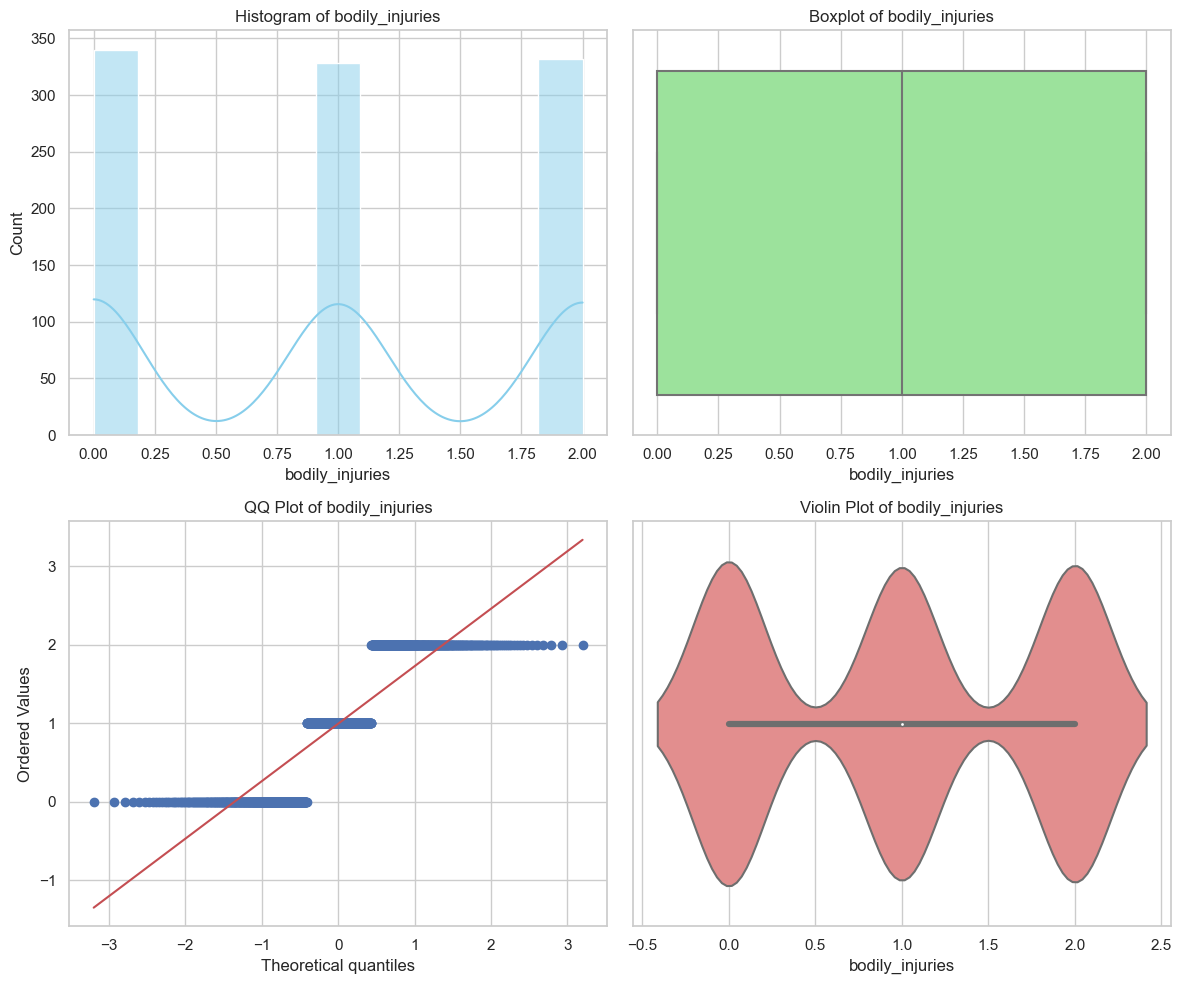

                                                   Value
count                                               1000
mean                                               0.992
median                                               1.0
mode                                                 [0]
std_dev                                         0.820127
variance                                        0.672609
min                                                    0
max                                                    2
range                                                  2
skewness                                        0.014777
kurtosis                                       -1.513178
quantiles               {0.25: 0.0, 0.5: 1.0, 0.75: 2.0}
num_outliers                                           0
outlier_values                                        []
normality_test                              Shapiro-Wilk
normality_pvalue                                     0.0
is_normal_distribution         

In [137]:
univariate_analysis(df, cols=['bodily_injuries'], output_dir=None)  

In [138]:
univariate_analysis(df, cols=['witnesses'], output_dir=None)    


Analyzing 'witnesses':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                                                   Value
count                                               1000
mean                                               1.487
median                                               1.0
mode                                                 [1]
std_dev                                         1.111335
variance                                        1.235066
min                                                    0
max                                                    3
range                                                  3
skewness                                        0.019636
kurtosis                                       -1.343629
quantiles               {0.25: 1.0, 0.5: 1.0, 0.75: 2.0}
num_outliers                                           0
outlier_values                                        []
normality_test                              Shapiro-Wilk
normality_pvalue                                     0.0
is_normal_distribution         


Analyzing 'total_claim_amount':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


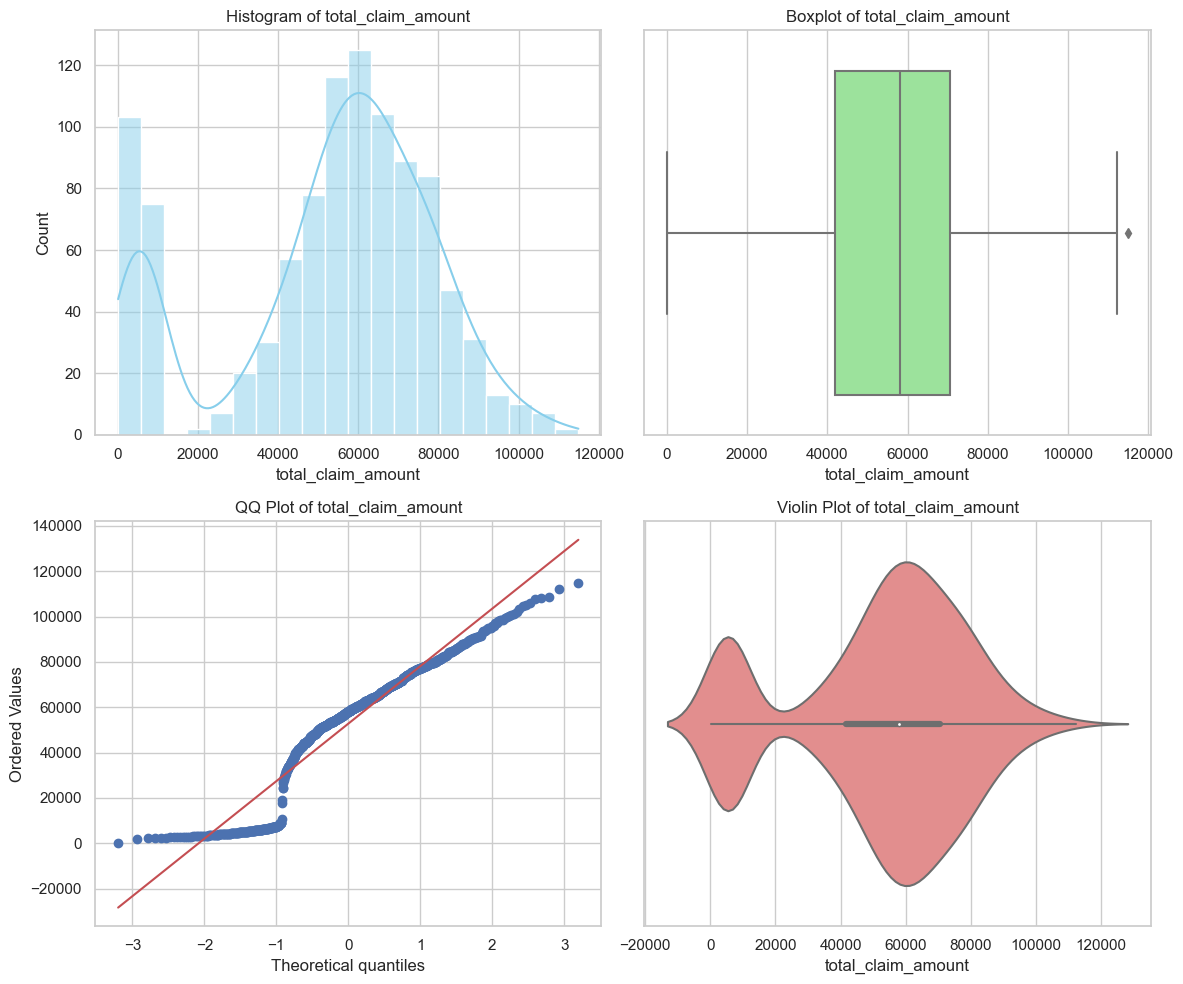

                                                               Value
count                                                           1000
mean                                                        52761.94
median                                                       58055.0
mode                                                         [59400]
std_dev                                                  26401.53319
variance                                             697040954.79119
min                                                              100
max                                                           114920
range                                                         114820
skewness                                                   -0.594582
kurtosis                                                   -0.454081
quantiles               {0.25: 41812.5, 0.5: 58055.0, 0.75: 70592.5}
num_outliers                                                       1
outlier_values                    

In [139]:
univariate_analysis(df, cols=['total_claim_amount'], output_dir=None)

In [140]:
univariate_analysis(df, cols=['injury_claim'], output_dir=None)


Analyzing 'injury_claim':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                                                             Value
count                                                         1000
mean                                                       7433.42
median                                                      6775.0
mode                                                           [0]
std_dev                                                4880.951853
variance                                           23823690.994595
min                                                              0
max                                                          21450
range                                                        21450
skewness                                                  0.264811
kurtosis                                                 -0.763087
quantiles               {0.25: 4295.0, 0.5: 6775.0, 0.75: 11305.0}
num_outliers                                                     0
outlier_values                                                

In [141]:
univariate_analysis(df, cols=['property_claim'], output_dir=None)


Analyzing 'property_claim':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                                                             Value
count                                                         1000
mean                                                       7399.57
median                                                      6750.0
mode                                                           [0]
std_dev                                                4824.726179
variance                                           23277982.697798
min                                                              0
max                                                          23670
range                                                        23670
skewness                                                  0.378169
kurtosis                                                 -0.376386
quantiles               {0.25: 4445.0, 0.5: 6750.0, 0.75: 10885.0}
num_outliers                                                     6
outlier_values          [21580, 21240, 21630, 23670, 21810, 20


Analyzing 'vehicle_claim':


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


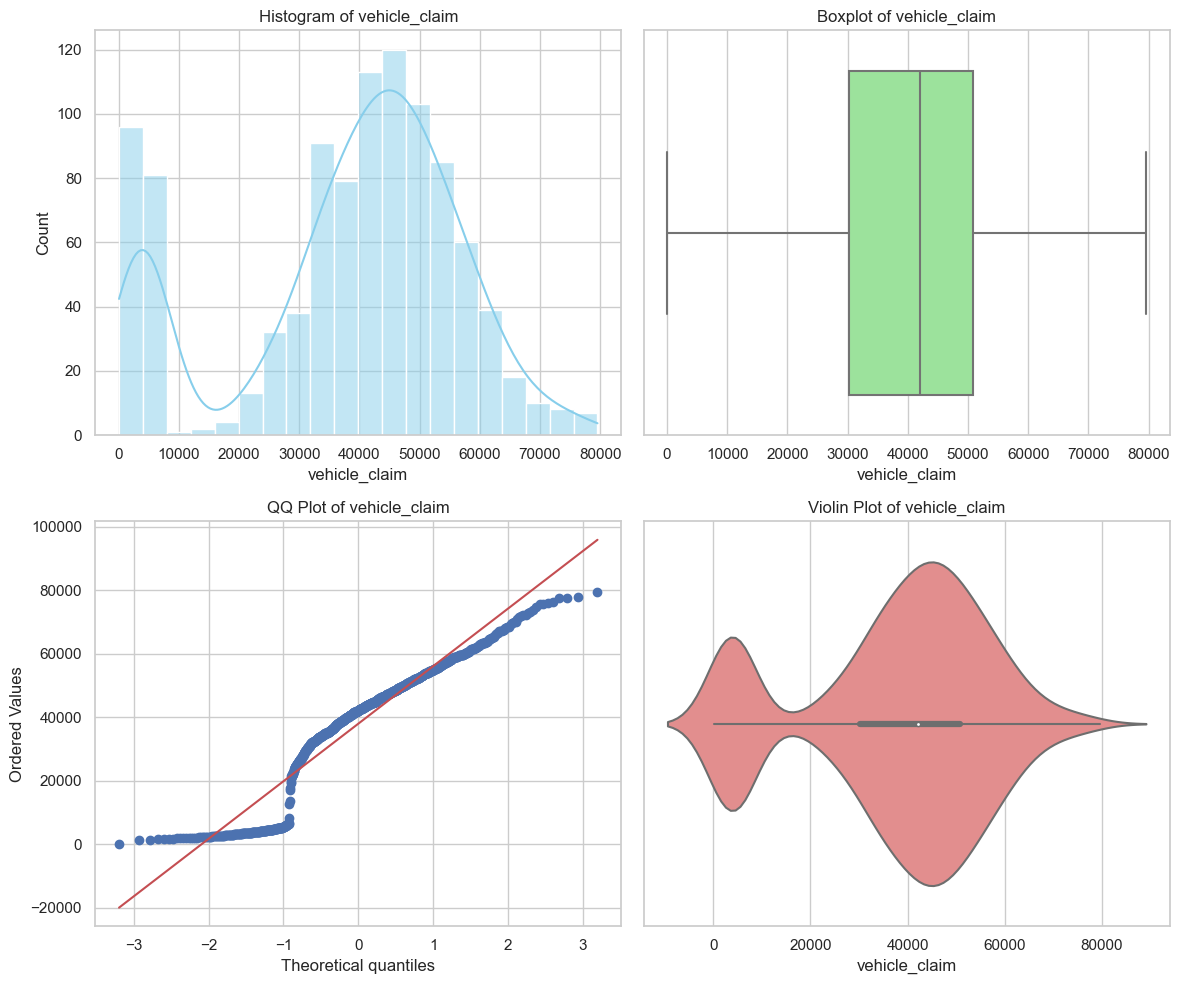

                                                               Value
count                                                           1000
mean                                                        37928.95
median                                                       42100.0
mode                                                          [5040]
std_dev                                                 18886.252893
variance                                            356690548.345843
min                                                               70
max                                                            79560
range                                                          79490
skewness                                                   -0.621098
kurtosis                                                   -0.446573
quantiles               {0.25: 30292.5, 0.5: 42100.0, 0.75: 50822.5}
num_outliers                                                       0
outlier_values                    

In [142]:
univariate_analysis(df, cols=['vehicle_claim'], output_dir=None)

In [143]:

# zip distribution

"""

Frequency Distribution: Helps identify which zip codes have the highest number of policies.



"""

top_zip_codes = df['insured_zip'].value_counts().nlargest(6).index

sns.countplot(x='insured_zip', data=df[df['insured_zip'].isin(top_zip_codes)])



<Axes: xlabel='insured_zip', ylabel='count'>

In [144]:
df['insured_zip'].value_counts()


insured_zip
477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: count, Length: 995, dtype: int64

Univariate Analysis on Categorical Columns(Noting High Cardinality)

For categorical variables with a large number of unique categories , displaying all categories may not be practical the visualization to the top 10 most frequent categories in such cases.


Missing Values: Indicates if any data cleaning is needed.

Unique Values: Helps understand the diversity within the variable.

Frequency Counts: Shows how the data is distributed across different categories.



Categorical columns to analyze:
['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Analysis of 'policy_state':
---------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64




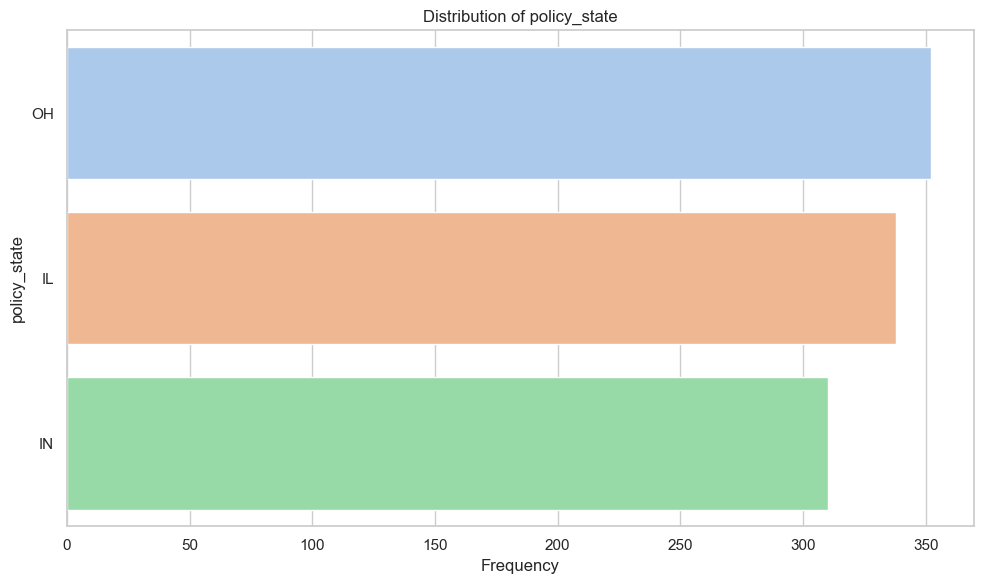




Analysis of 'policy_csl':
-------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64







Analysis of 'insured_sex':
--------------------------
Missing values: 0
Number of unique values: 2

Unique values and their counts:
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64







Analysis of 'insured_education_level':
--------------------------------------
Missing values: 0
Number of unique values: 7

Unique values and their counts:
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64




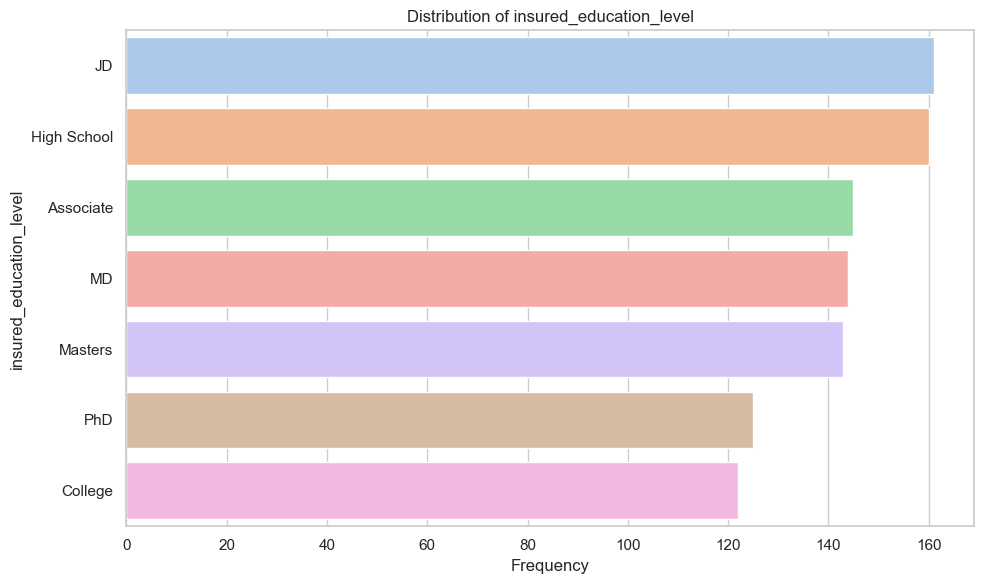




Analysis of 'insured_occupation':
---------------------------------
Missing values: 0
Number of unique values: 14

Unique values and their counts:
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64







Analysis of 'insured_hobbies':
------------------------------
Missing values: 0
Number of unique values: 20

Unique values and their counts:
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: count, dtype: int64







Analysis of 'insured_relationship':
-----------------------------------
Missing values: 0
Number of unique values: 6

Unique values and their counts:
insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64







Analysis of 'incident_type':
----------------------------
Missing values: 0
Number of unique values: 4

Unique values and their counts:
incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64




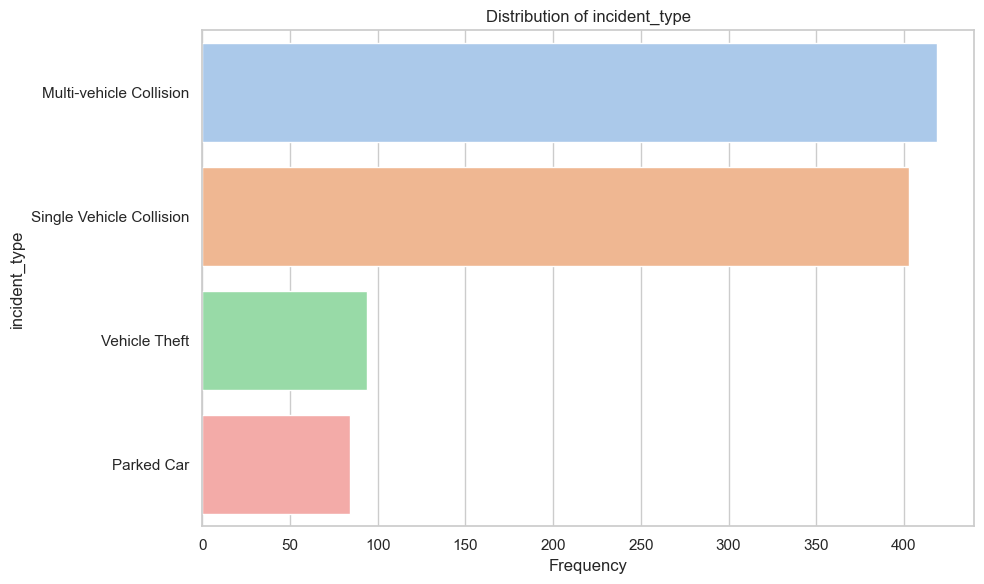




Analysis of 'collision_type':
-----------------------------
Missing values: 0
Number of unique values: 4

Unique values and their counts:
collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64







Analysis of 'incident_severity':
--------------------------------
Missing values: 0
Number of unique values: 4

Unique values and their counts:
incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: count, dtype: int64




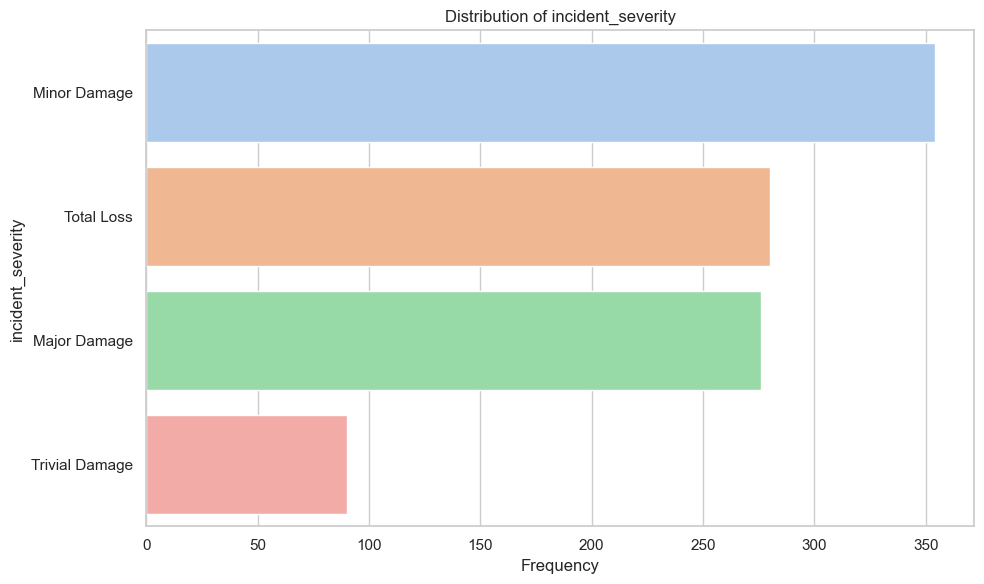




Analysis of 'authorities_contacted':
------------------------------------
Missing values: 91
Number of unique values: 4

Unique values and their counts:
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64




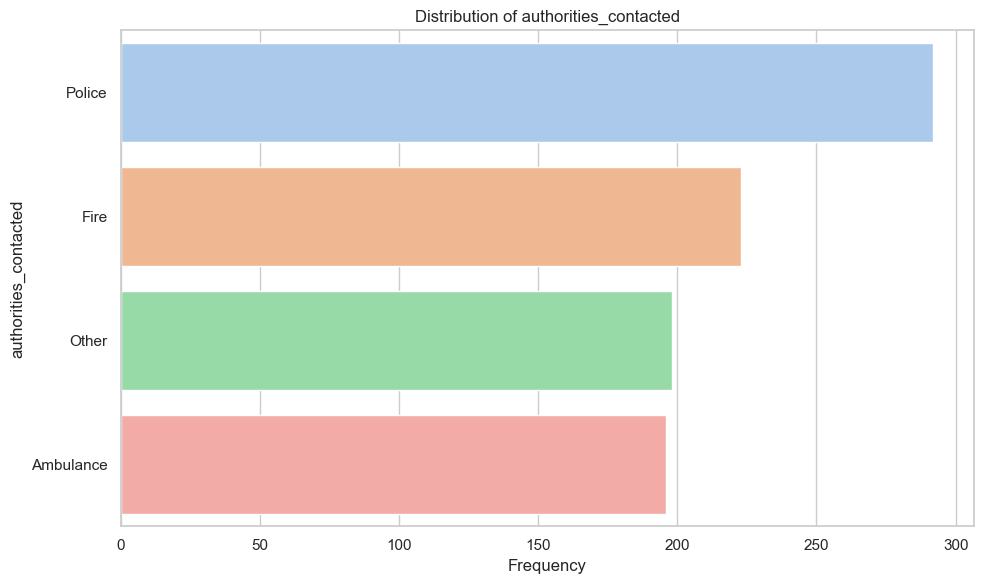




Analysis of 'incident_state':
-----------------------------
Missing values: 0
Number of unique values: 7

Unique values and their counts:
incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64




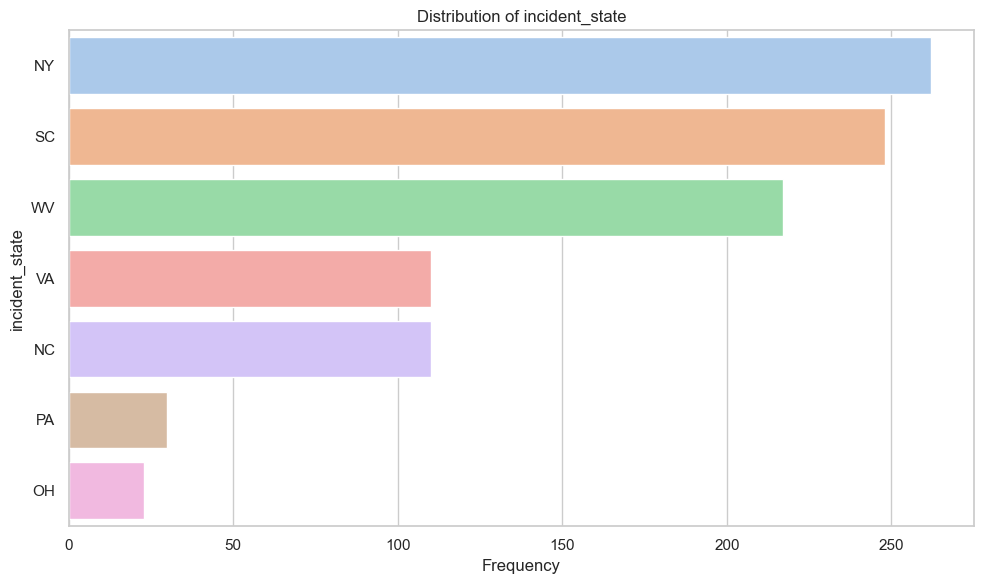




Analysis of 'incident_city':
----------------------------
Missing values: 0
Number of unique values: 7

Unique values and their counts:
incident_city
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: count, dtype: int64




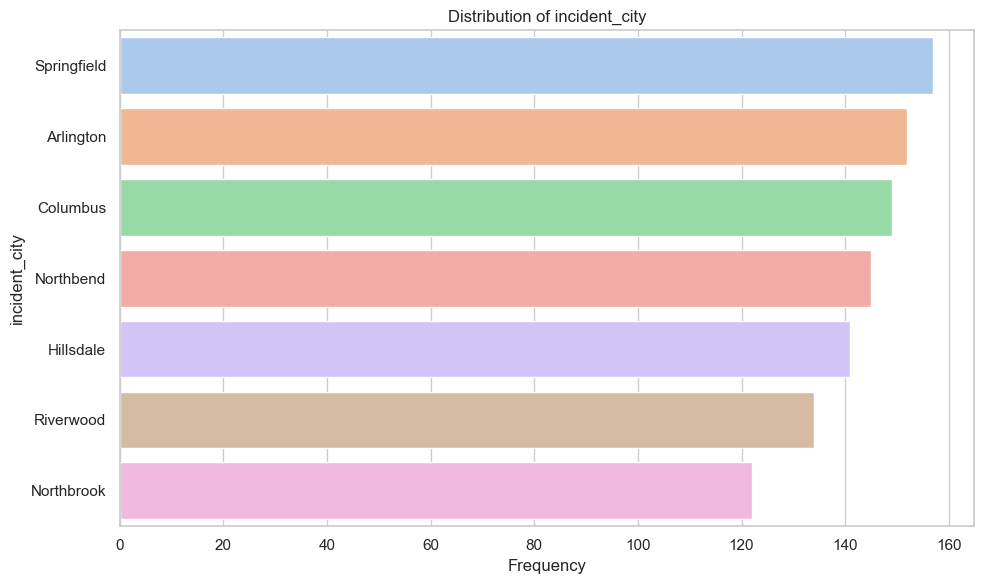




Analysis of 'incident_location':
--------------------------------
Missing values: 0
Number of unique values: 1000

Unique values and their counts:
incident_location
9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: count, Length: 1000, dtype: int64




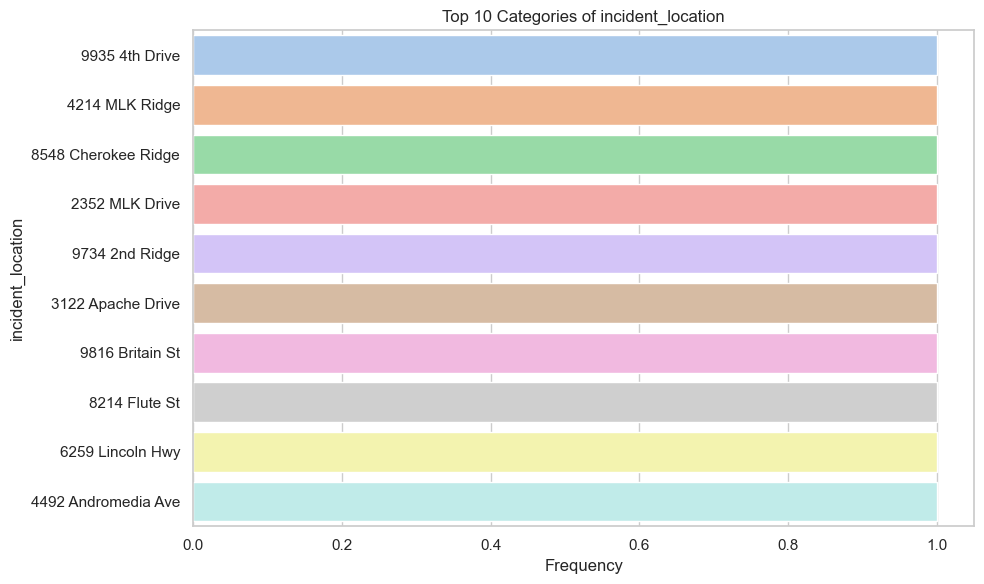




Analysis of 'property_damage':
------------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64







Analysis of 'police_report_available':
--------------------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64




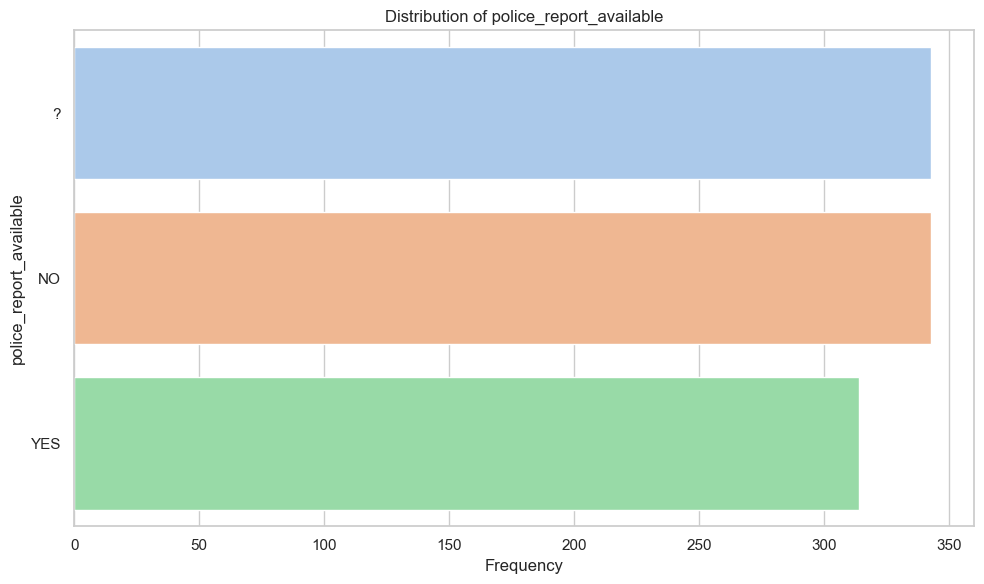




Analysis of 'auto_make':
------------------------
Missing values: 0
Number of unique values: 14

Unique values and their counts:
auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64







Analysis of 'auto_model':
-------------------------
Missing values: 0
Number of unique values: 39

Unique values and their counts:
auto_model
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: count, dtype: int64




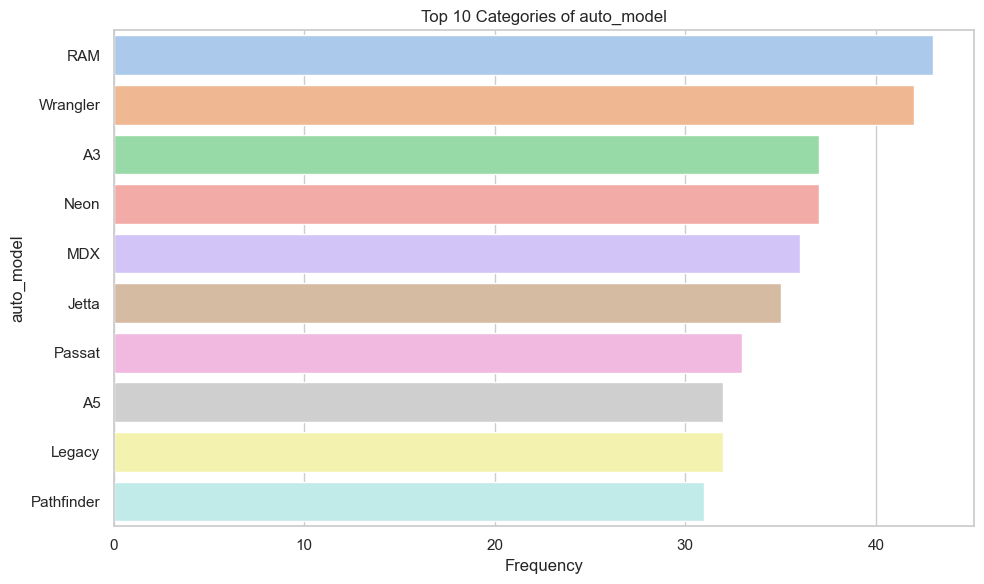




Analysis of 'fraud_reported':
-----------------------------
Missing values: 0
Number of unique values: 2

Unique values and their counts:
fraud_reported
N    753
Y    247
Name: count, dtype: int64




In [145]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Exclude date columns 
date_columns = ['policy_bind_date', 'incident_date','auto_year',]
categorical_columns = [col for col in categorical_columns if col not in date_columns]

print("Categorical columns to analyze:")
print(categorical_columns)
print("\n")

# Set the style for seaborn
sns.set(style="whitegrid")

# Iterating over each categorical column to perform analysis
for col in categorical_columns:
    print(f"Analysis of '{col}':")
    print("-" * (len(col) + 15))
    
    # Check for missing values
    missing_values = df[col].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    # Unique values
    unique_values = df[col].nunique()
    print(f"Number of unique values: {unique_values}")
    print("\nUnique values and their counts:")
    print(df[col].value_counts())
    print("\n")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    # If the number of unique categories is high, display the top 10
    if unique_values > 10:
        top_categories = df[col].value_counts().nlargest(10).index
        sns.countplot(y=col, data=df[df[col].isin(top_categories)], order=top_categories, palette='pastel')
        plt.title(f'Top 10 Categories of {col}')
        plt.ylabel(col)
        plt.xlabel('Frequency')
    else:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
        plt.xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    print("\n\n")


Univariate Analysis on Date columns

Missing values in date columns may indicate incomplete records.

Investigate why dates are missing and consider imputing or removing those records based on context.

Date Range to Understand the  Time Span:Knowing the earliest and latest dates helps contextualize the data.

If policy_bind_date ranges from 2015-01-01 to 2016-12-31, the data covers a two-year period.

Distribution of Data  Over Time using Histograms shows how data points are distributed over the time period.Can reveal  any seasonal patterns

Trends:Look for patterns such as seasonality or trends over years.


Analysis of 'policy_bind_date':
-------------------------------
Missing values: 0
Date range: 1990-01-08 00:00:00 to 2015-02-22 00:00:00


Value counts by year for 'policy_bind_date':
policy_bind_date_year
1990    48
1991    55
1992    48
1993    33
1994    41
1995    39
1996    43
1997    44
1998    30
1999    40
2000    31
2001    41
2002    50
2003    37
2004    36
2005    40
2006    41
2007    40
2008    33
2009    43
2010    38
2011    32
2012    36
2013    35
2014    43
2015     3
Name: count, dtype: int64


Value counts by month for 'policy_bind_date':
policy_bind_date_month
1     83
2     90
3     79
4     83
5     69
6     80
7     91
8     93
9     74
10    78
11    85
12    95
Name: count, dtype: int64


Value counts by day of week for 'policy_bind_date':
policy_bind_date_day_name
Wednesday    153
Sunday       153
Saturday     148
Tuesday      138
Friday       137
Thursday     137
Monday       134
Name: count, dtype: int64




c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


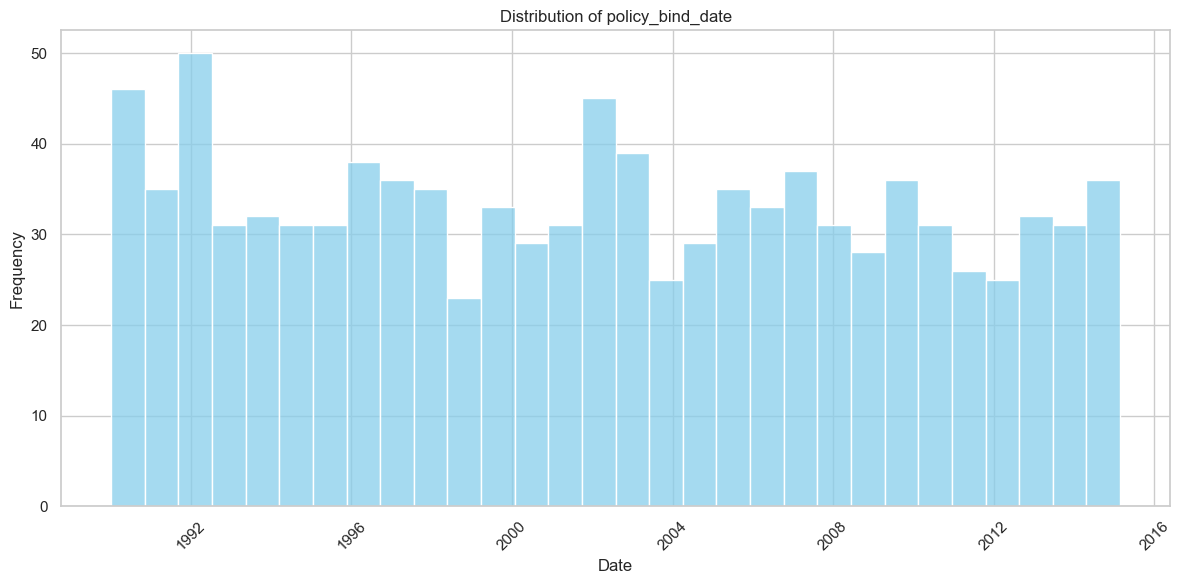

In [146]:


# List of date columns
policy_start_date = ['policy_bind_date']

# Convert date columns to datetime format
for col in policy_start_date:
    df[col] = pd.to_datetime(df[col], errors='coerce')  

# Iterating  over each date column to perform analysis
for col in policy_start_date:
    print(f"Analysis of '{col}':")
    print("-" * (len(col) + 15))
    
    # Check for missing values
    missing_values = df[col].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    # Basic statistics
    print(f"Date range: {df[col].min()} to {df[col].max()}")
    print("\n")
    
    # Extract date components
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_dayofweek'] = df[col].dt.dayofweek  # Monday=0, Sunday=6
    df[col + '_day_name'] = df[col].dt.day_name()
    
    # Value counts for year, month, day of week
    print(f"Value counts by year for '{col}':")
    print(df[col + '_year'].value_counts().sort_index())
    print("\n")
    
    print(f"Value counts by month for '{col}':")
    print(df[col + '_month'].value_counts().sort_index())
    print("\n")
    
    print(f"Value counts by day of week for '{col}':")
    print(df[col + '_day_name'].value_counts())
    print("\n")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plotting counts by month
    plt.figure(figsize=(10, 6))
    month_counts = df[col + '_month'].value_counts().sort_index()
    sns.barplot(x=month_counts.index, y=month_counts.values, palette='pastel')
    plt.title(f'Distribution of {col} by Month')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plotting counts by day of week
    plt.figure(figsize=(10, 6))
    day_counts = df[col + '_day_name'].value_counts()
    sns.barplot(x=day_counts.index, y=day_counts.values, palette='pastel')
    plt.title(f'Distribution of {col} by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    
    print("\n\n")


Summary Statistics of Incident Counts per Date:
count    60.000000
mean     16.666667
std       4.594273
min       7.000000
25%      13.000000
50%      17.000000
75%      19.000000
max      28.000000
Name: count, dtype: float64

First few entries of date_counts:
incident_date
2015-01-01    19
2015-01-02    11
2015-01-03    18
2015-01-04    12
2015-01-05     7
Name: count, dtype: int64


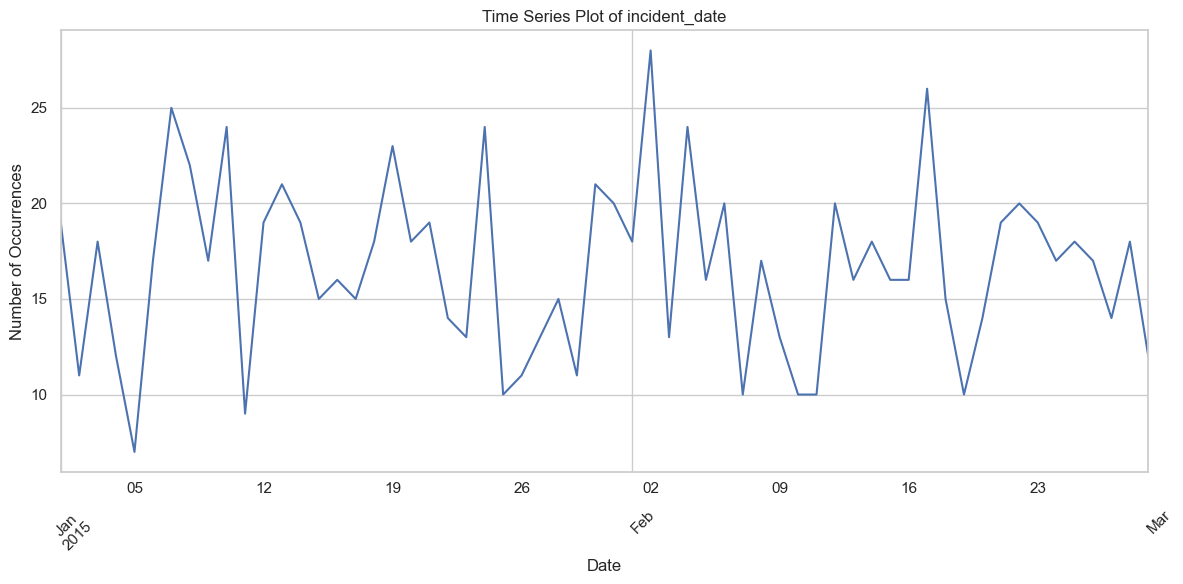


Summary Statistics of Monthly Counts:
count      3.000000
mean     333.333333
std      279.151094
min       12.000000
25%      242.000000
50%      472.000000
75%      494.000000
max      516.000000
dtype: float64


C:\Users\FLEX 5\AppData\Local\Temp\ipykernel_4000\1468413040.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='incident_date').size()


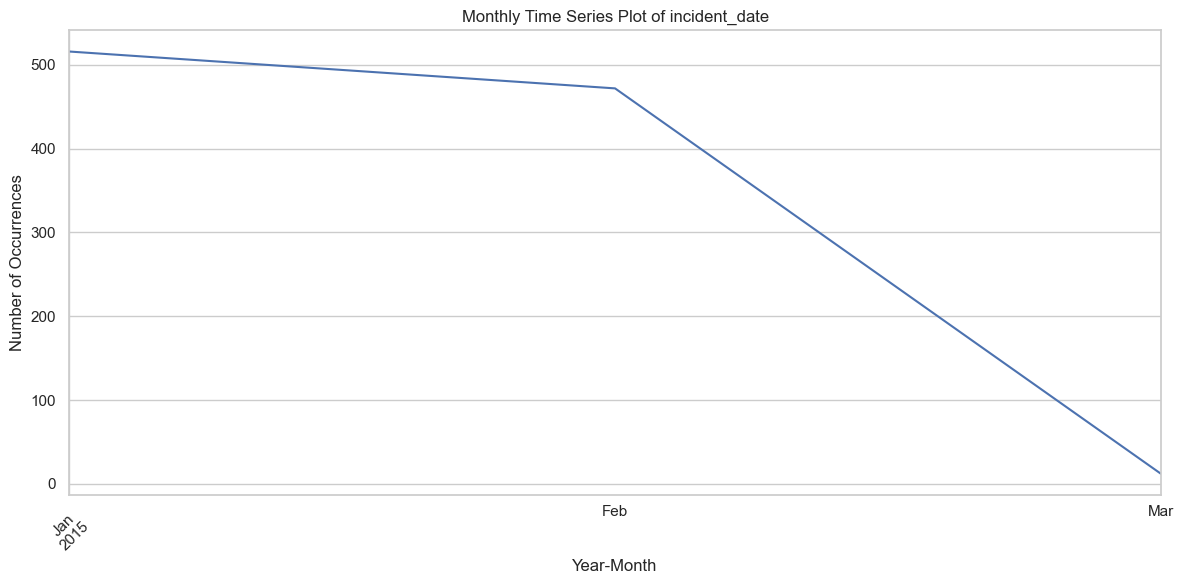


Top 10 Dates with Highest Number of Incidents:
incident_date
2015-01-07    25
2015-01-08    22
2015-01-10    24
2015-01-13    21
2015-01-19    23
2015-01-24    24
2015-01-30    21
2015-02-02    28
2015-02-04    24
2015-02-17    26
Name: count, dtype: int64



Incident Types on Top 10 Dates:
incident_type
Multi-vehicle Collision     101
Single Vehicle Collision     98
Vehicle Theft                22
Parked Car                   17
Name: count, dtype: int64


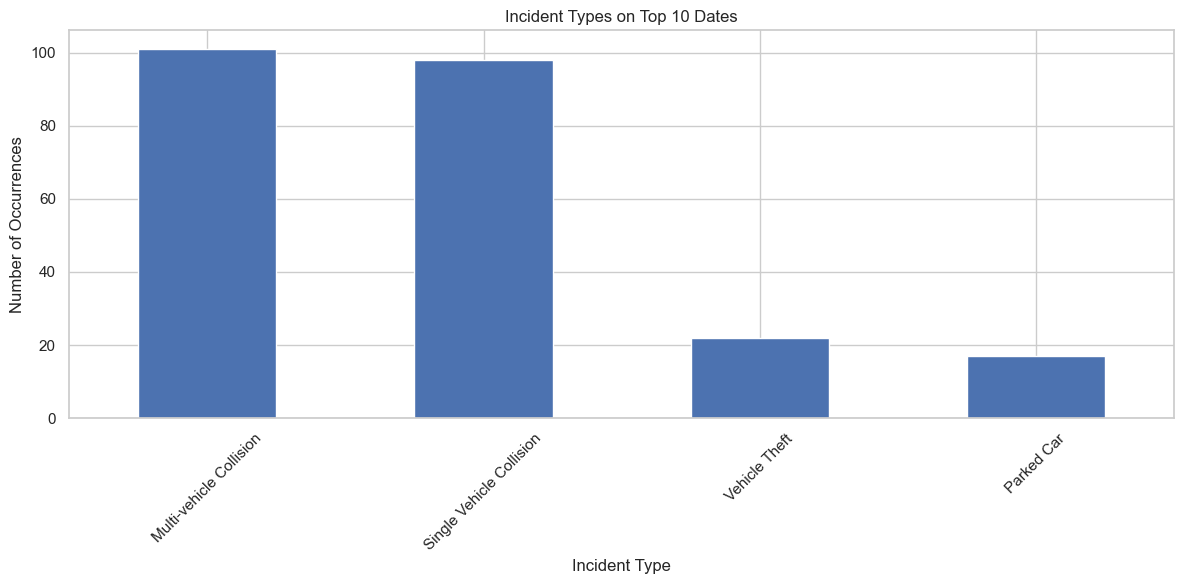

In [147]:


# Convert incident_date column to datetime
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

# Set the style for seaborn
sns.set(style="whitegrid")

# Aggregatting data to get counts per date
date_counts = df['incident_date'].value_counts().sort_index()

# Printing summary statistics of incident counts per date
print("Summary Statistics of Incident Counts per Date:")
print(date_counts.describe())

# Printing the first few entries
print("\nFirst few entries of date_counts:")
print(date_counts.head())

# Plotting time series of incidents over time
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Time Series Plot of incident_date')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting monthly counts if dates span multiple years
monthly_counts = df.resample('M', on='incident_date').size()

# Printing summary statistics of monthly counts
print("\nSummary Statistics of Monthly Counts:")
print(monthly_counts.describe())

# Plotting monthly counts
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Time Series Plot of incident_date')
plt.xlabel('Year-Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate Analysis on Top 10 Dates with Highest Number of Incidents
# Finding the top 10 dates
top_10_dates = df['incident_date'].value_counts().nlargest(10)
top_10_dates = top_10_dates.sort_index()

# Printing top 10 dates with their counts
print("\nTop 10 Dates with Highest Number of Incidents:")
print(top_10_dates)

# Plotting the top 10 dates
plt.figure(figsize=(12, 6))
top_10_dates.plot(kind='bar')
plt.title('Top 10 Dates with Highest Number of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_10_data = df[df['incident_date'].isin(top_10_dates.index)]

# Counting of incidents by type for top 10 dates
if 'incident_type' in df.columns:
    incident_type_counts = top_10_data['incident_type'].value_counts()

    # Printing incident type counts
    print("\nIncident Types on Top 10 Dates:")
    print(incident_type_counts)

    plt.figure(figsize=(12, 6))
    incident_type_counts.plot(kind='bar')
    plt.title('Incident Types on Top 10 Dates')
    plt.xlabel('Incident Type')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Bivariate Analysis

We will concentrate on Bivariate Analysis of Features against target variable.

Our aim is to check for statistical significance in correlation between features and target variable.

Various tests will be used, Shapiros, Man-Whitney, Levenes,Independent T tests and Chi-tests (on the categorical variables)

Point-Biserial Correlation is ideal for this setup because it quantifies how strongly the continuous variable (x) is associated with the two categories of the binary variable (y).(yes/no)

We will then visualize the same

Numerical Variables against Target


Numerical Columns Identified for Analysis: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39', 'target']

Analyzing Column: months_as_customer
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0205
P-Value: 0.5164
Result: No significant association between 'months_as_customer' and 'fraud_reported' (p >= 0.05)


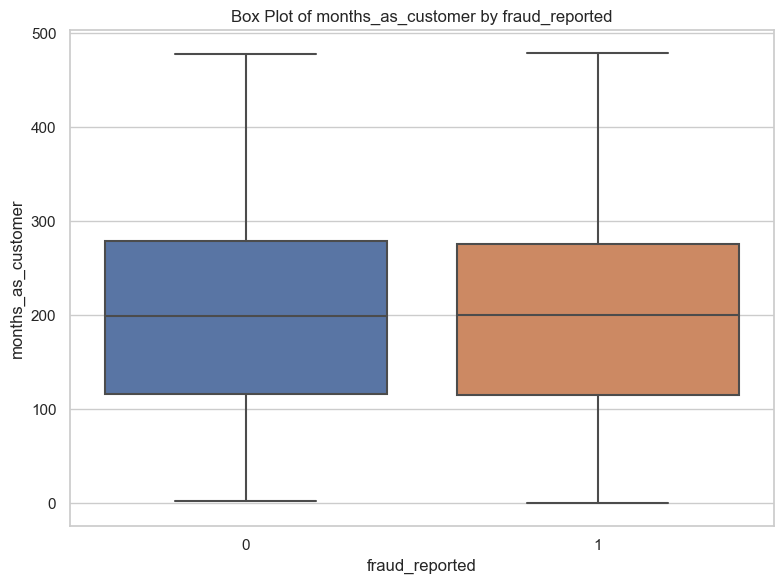

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Analyzing Column: age
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0121
P-Value: 0.7013
Result: No significant association between 'age' and 'fraud_reported' (p >= 0.05)


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


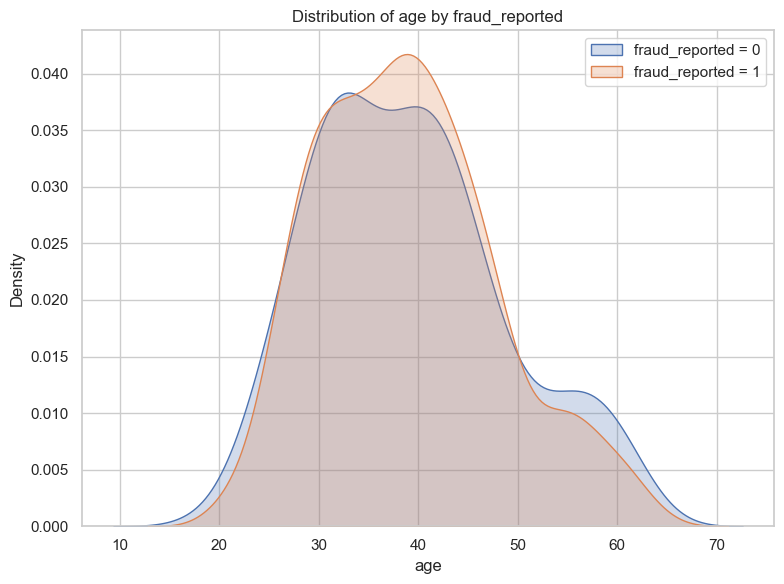


Analyzing Column: policy_number
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: 0.0294
P-Value: 0.3523
Result: No significant association between 'policy_number' and 'fraud_reported' (p >= 0.05)


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


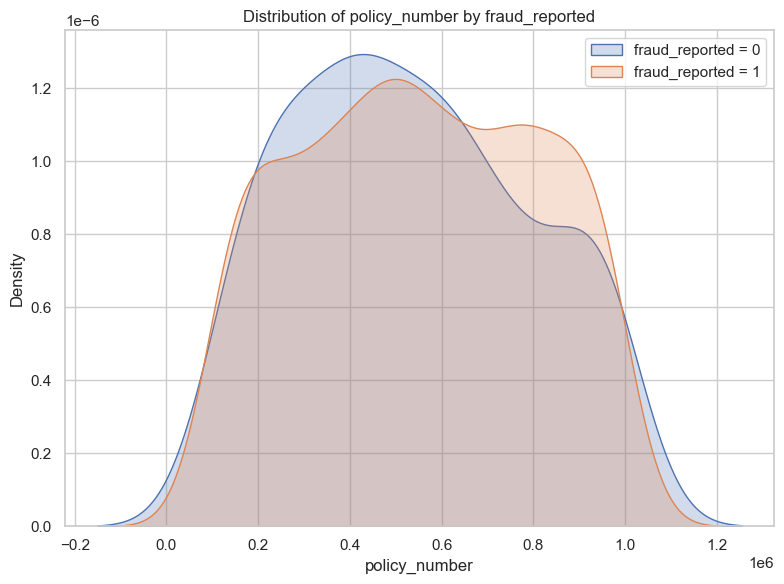


Analyzing Column: policy_deductable
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0148
P-Value: 0.6398
Result: No significant association between 'policy_deductable' and 'fraud_reported' (p >= 0.05)


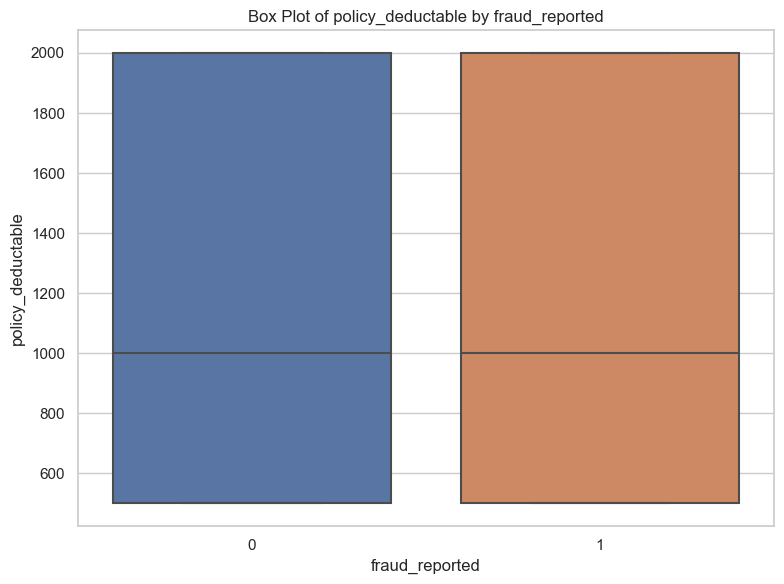

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Analyzing Column: policy_annual_premium
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: 0.0145
P-Value: 0.6474
Result: No significant association between 'policy_annual_premium' and 'fraud_reported' (p >= 0.05)


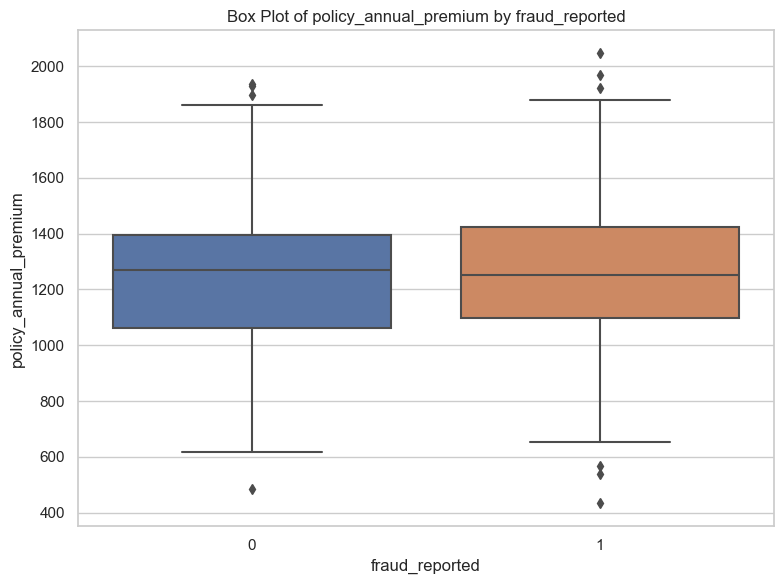

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Analyzing Column: umbrella_limit
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0586
P-Value: 0.0639
Result: No significant association between 'umbrella_limit' and 'fraud_reported' (p >= 0.05)


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


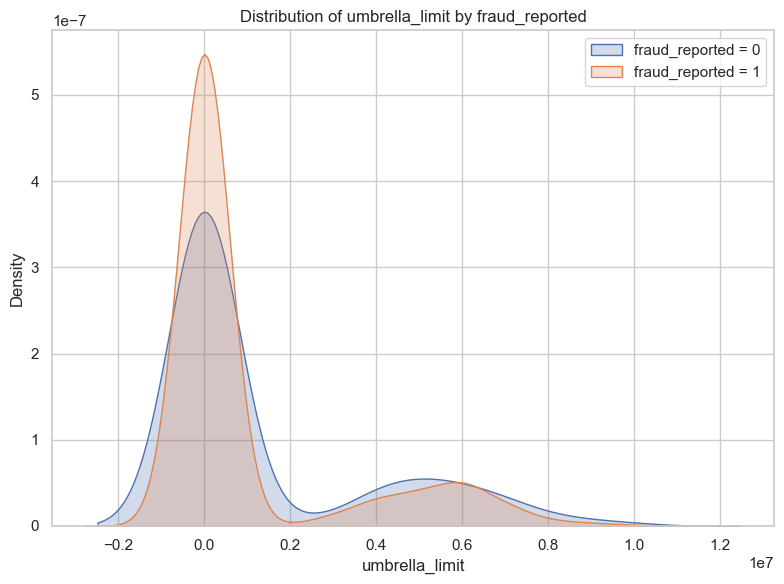


Analyzing Column: insured_zip
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0194
P-Value: 0.5407
Result: No significant association between 'insured_zip' and 'fraud_reported' (p >= 0.05)


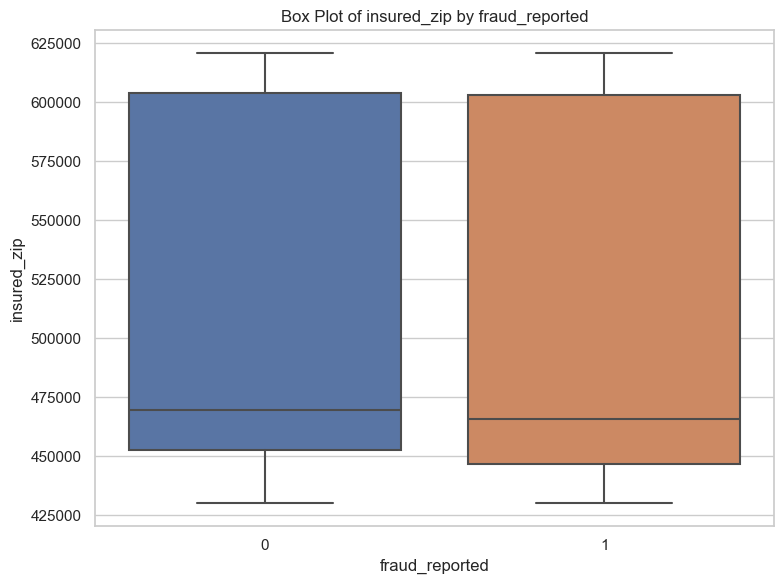

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Analyzing Column: capital-gains
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: 0.0192
P-Value: 0.5448
Result: No significant association between 'capital-gains' and 'fraud_reported' (p >= 0.05)


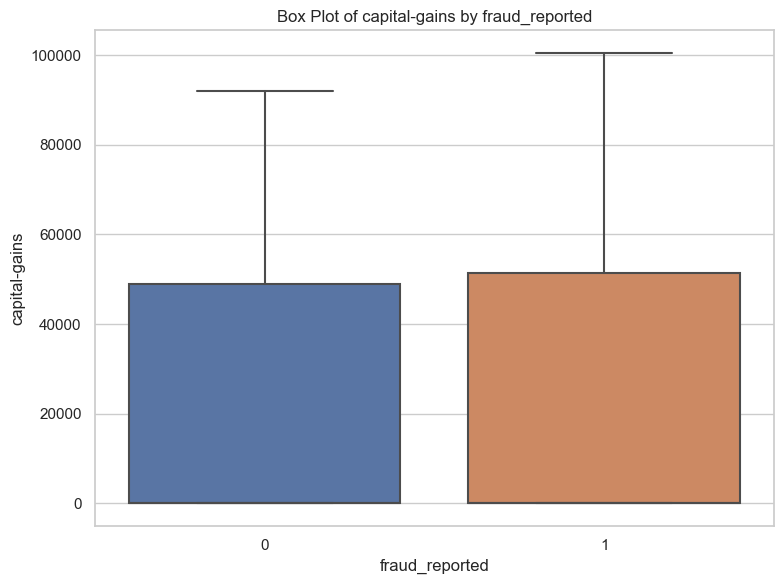

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


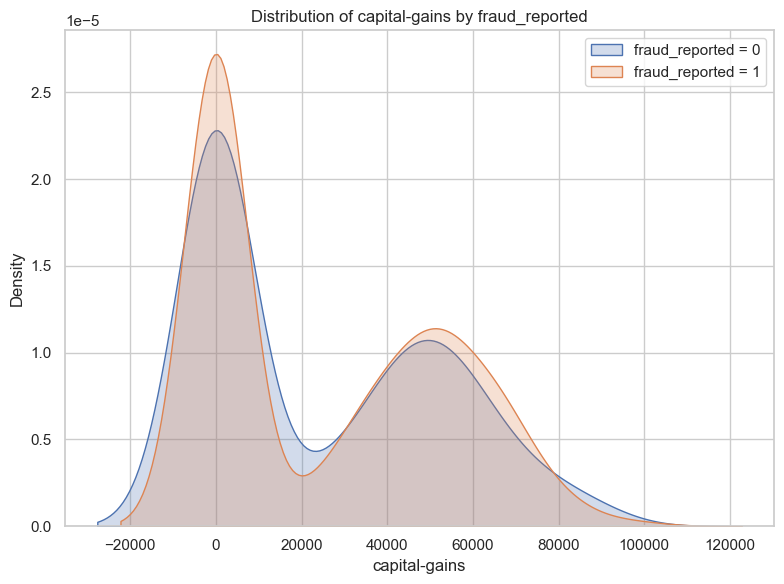


Analyzing Column: capital-loss
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: 0.0149
P-Value: 0.6387
Result: No significant association between 'capital-loss' and 'fraud_reported' (p >= 0.05)


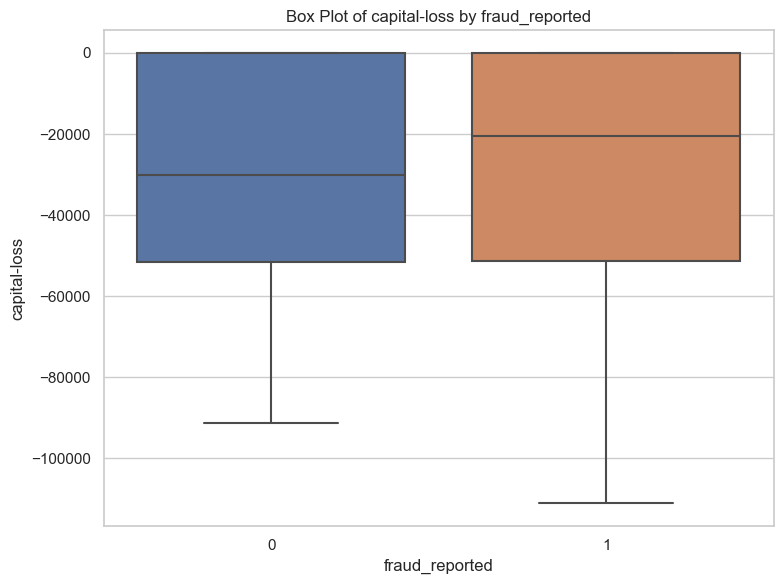

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


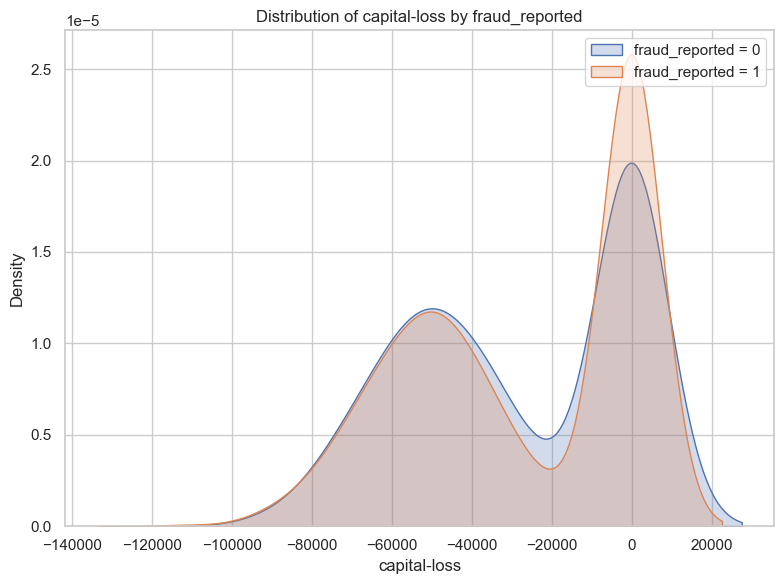


Analyzing Column: incident_hour_of_the_day
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0043
P-Value: 0.8916
Result: No significant association between 'incident_hour_of_the_day' and 'fraud_reported' (p >= 0.05)


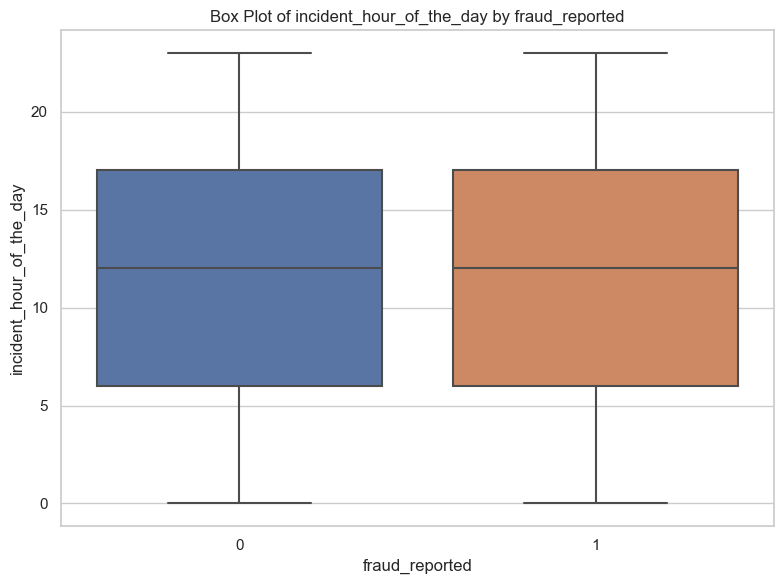

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


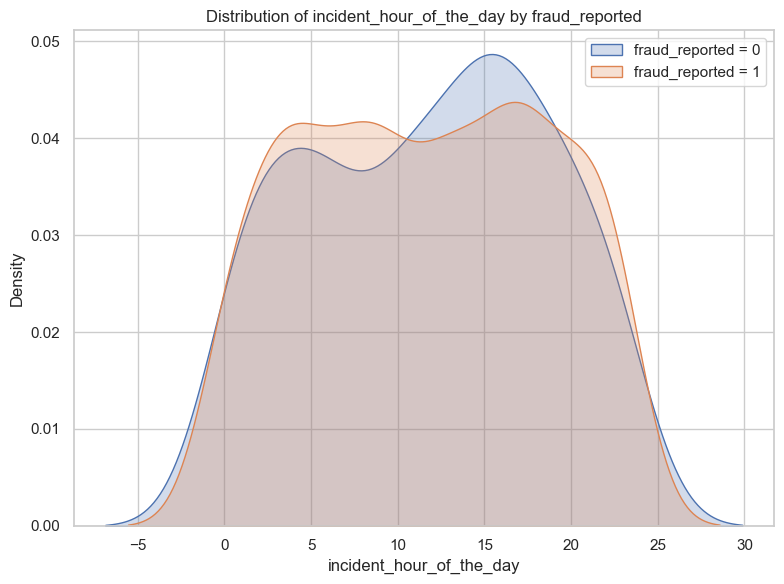


Analyzing Column: number_of_vehicles_involved
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0518
P-Value: 0.1014
Result: No significant association between 'number_of_vehicles_involved' and 'fraud_reported' (p >= 0.05)


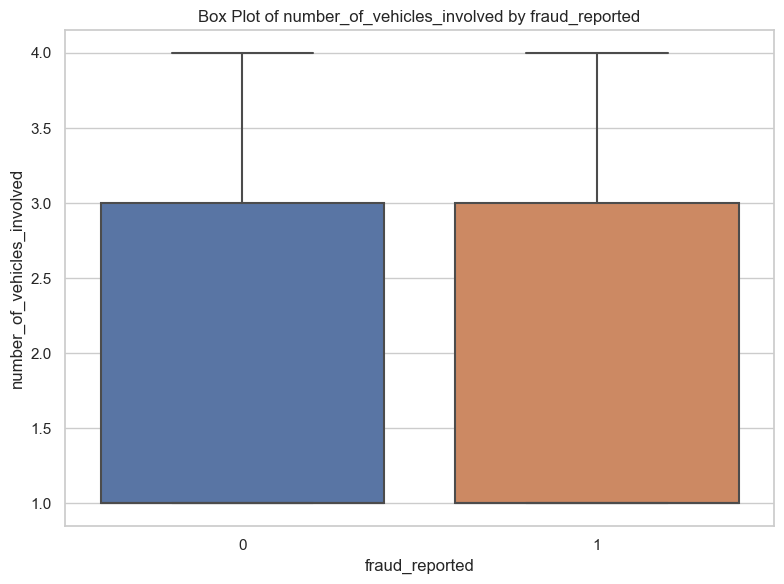

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


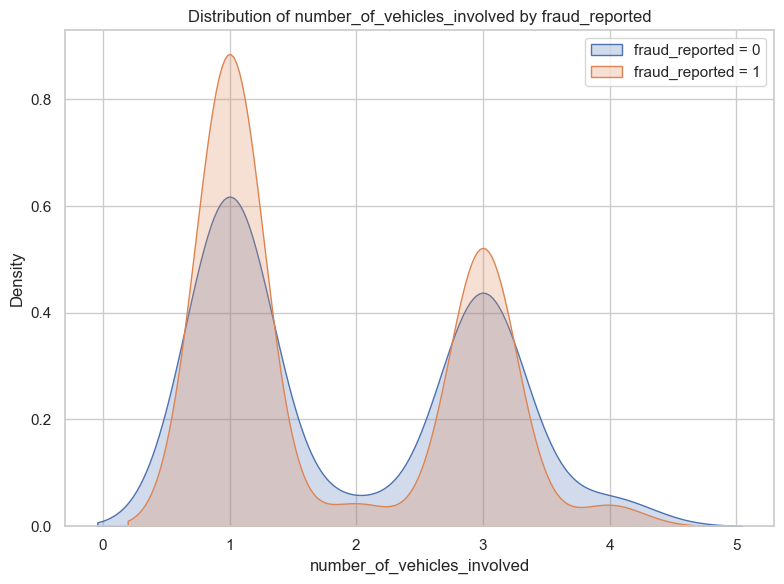


Analyzing Column: bodily_injuries
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0339
P-Value: 0.2845
Result: No significant association between 'bodily_injuries' and 'fraud_reported' (p >= 0.05)


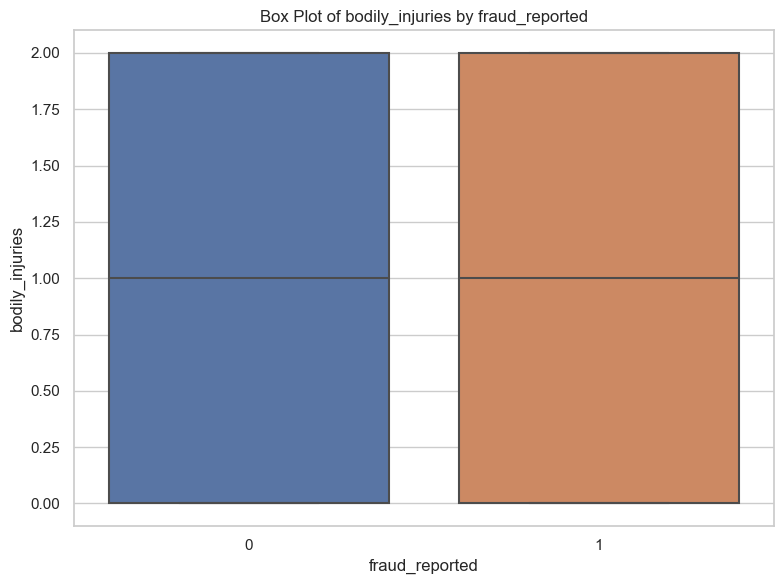

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


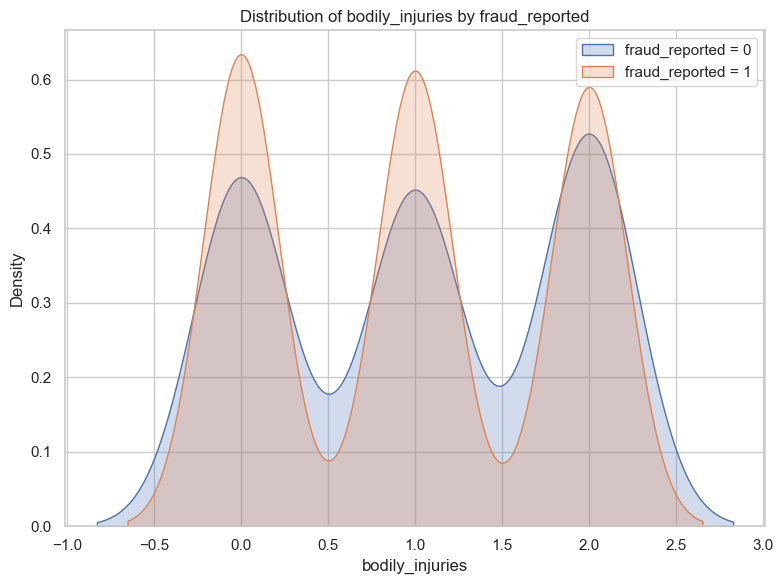


Analyzing Column: witnesses
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0495
P-Value: 0.1178
Result: No significant association between 'witnesses' and 'fraud_reported' (p >= 0.05)


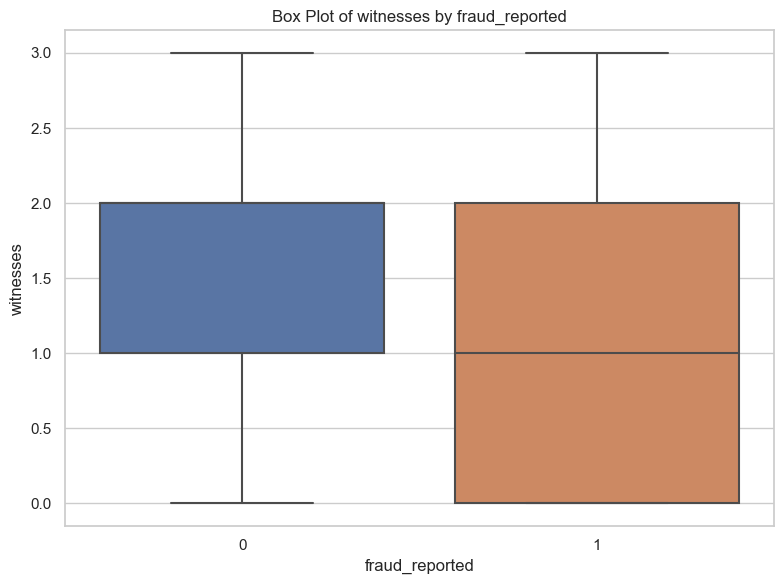

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


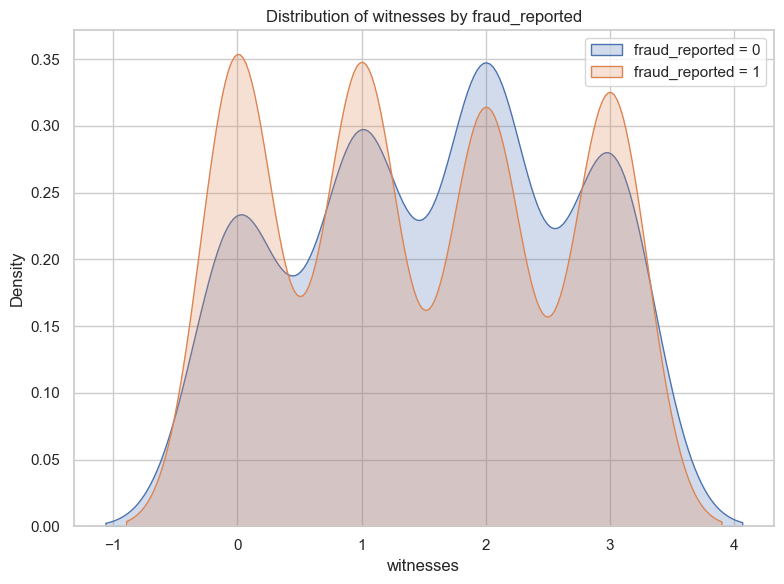


Analyzing Column: total_claim_amount
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.1637
P-Value: 0.0000
Result: Significant association between 'total_claim_amount' and 'fraud_reported' (p < 0.05)


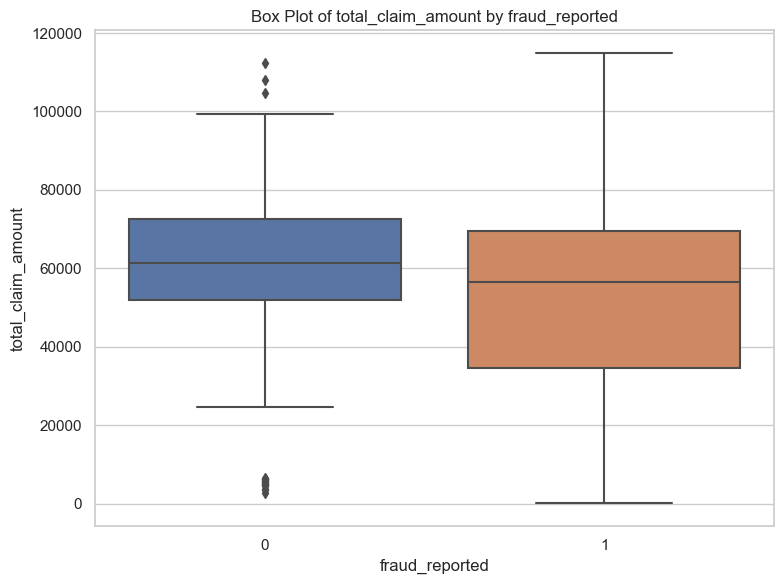

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


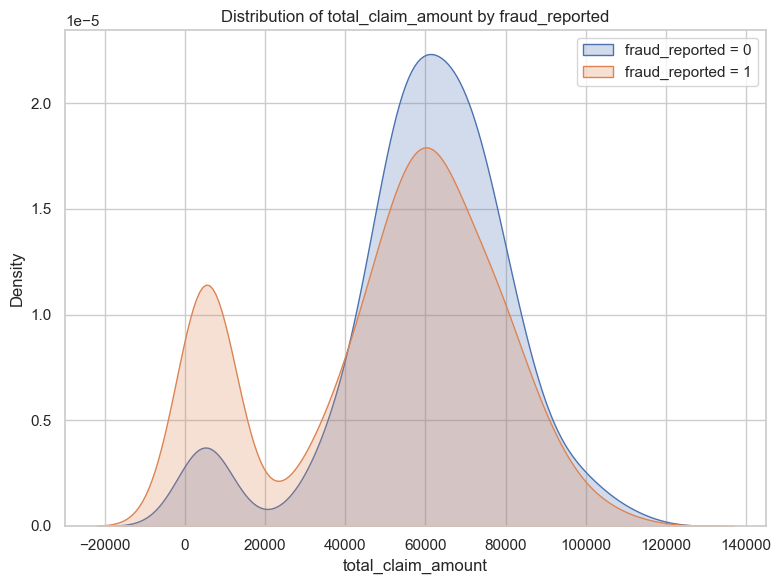


Analyzing Column: injury_claim
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0910
P-Value: 0.0040
Result: Significant association between 'injury_claim' and 'fraud_reported' (p < 0.05)


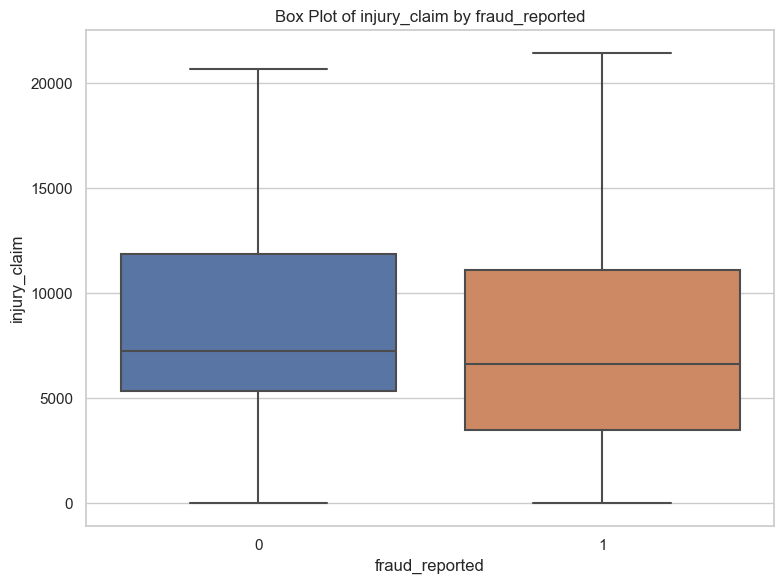

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


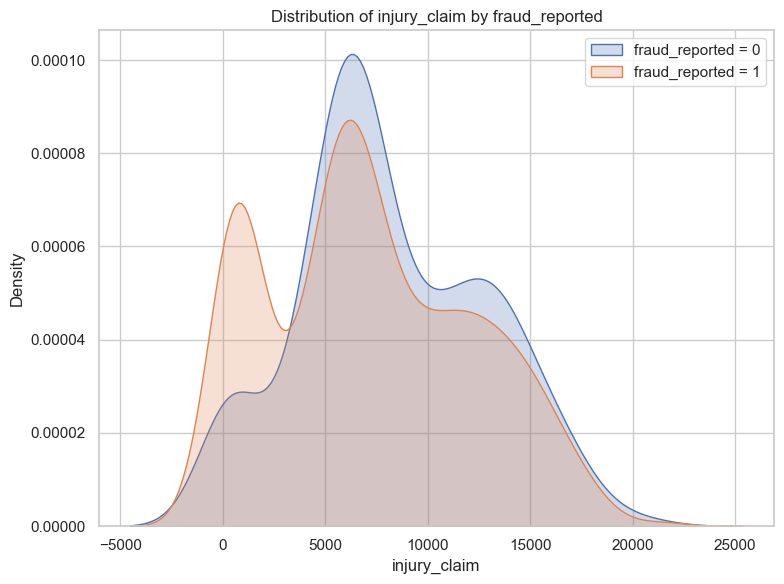


Analyzing Column: property_claim
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.1378
P-Value: 0.0000
Result: Significant association between 'property_claim' and 'fraud_reported' (p < 0.05)


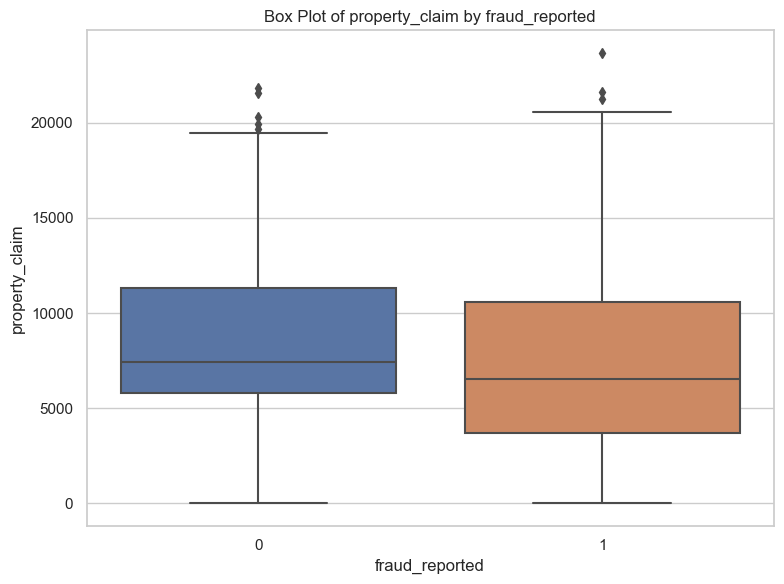

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Analyzing Column: vehicle_claim
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.1700
P-Value: 0.0000
Result: Significant association between 'vehicle_claim' and 'fraud_reported' (p < 0.05)


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


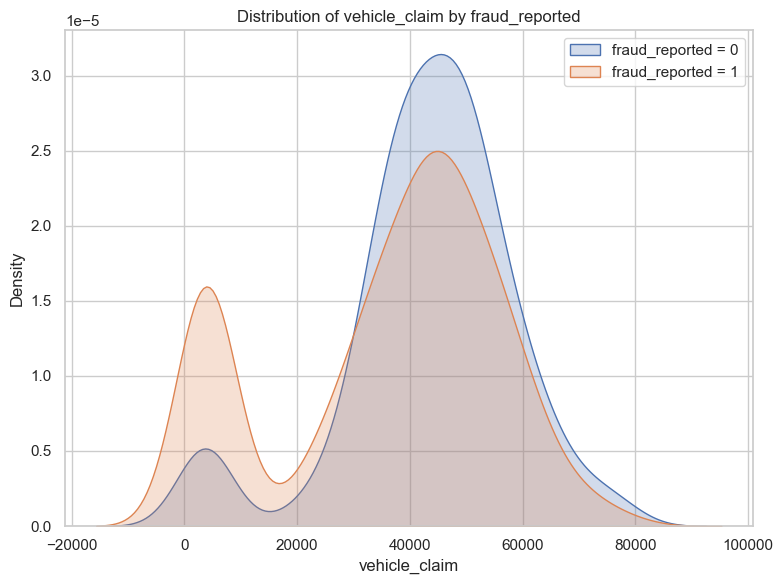


Analyzing Column: auto_year
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -0.0079
P-Value: 0.8023
Result: No significant association between 'auto_year' and 'fraud_reported' (p >= 0.05)


c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


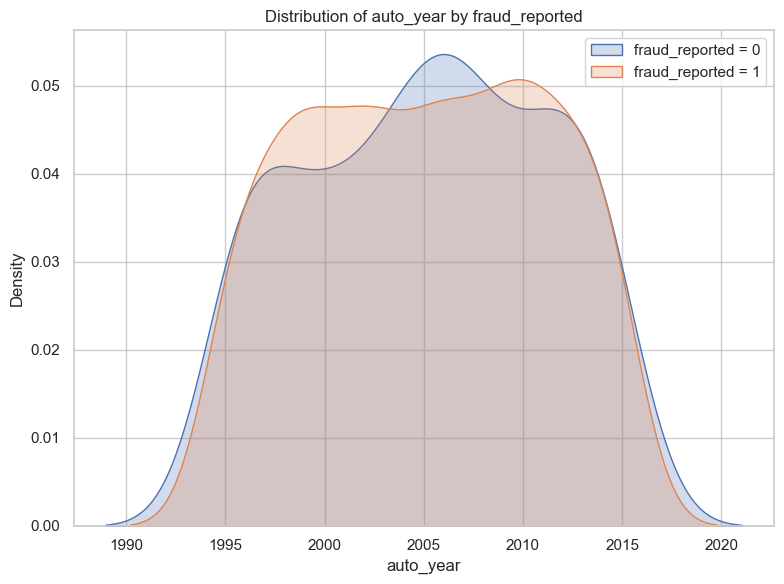


Analyzing Column: _c39
Skipping '_c39' as the target variable 'fraud_reported' is not binary.

Analyzing Column: target
Converting target variable 'fraud_reported' to binary (0 and 1).
Point-Biserial Correlation Coefficient: -1.0000
P-Value: 0.0000
Result: Significant association between 'target' and 'fraud_reported' (p < 0.05)


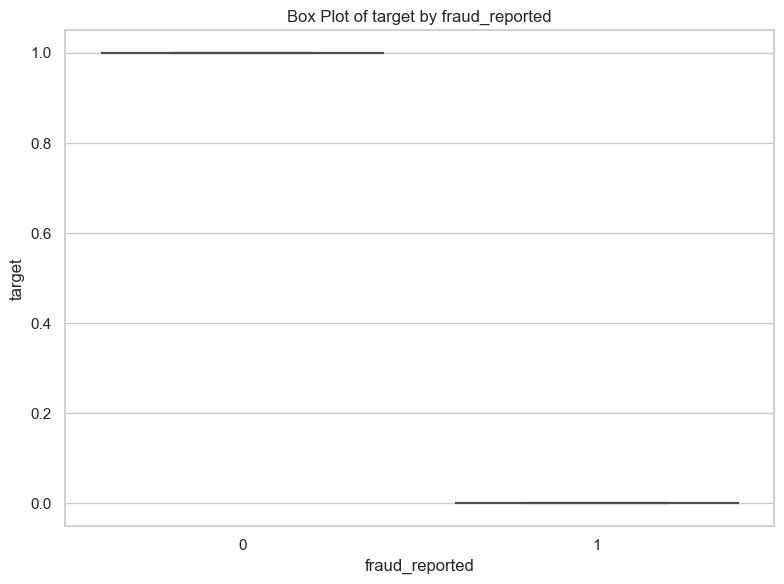

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FLEX 5\AppData\Local\Temp\ipykernel_4000\3143078075.py:68: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=x[y == 0], fill=True, label=f'{target_variable} = 0')
c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FLEX 5\AppData\Local\Temp\ipykernel_4000\3143078075.py:69: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warni


Variables Significantly Associated with 'fraud_reported':
- total_claim_amount
- injury_claim
- property_claim
- vehicle_claim
- target


In [163]:


# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Checking if the target variable exists
target_variable = 'fraud_reported'

if target_variable not in df.columns:
    print(f"The target variable '{target_variable}' is not in the DataFrame.")
else:
    # Identifying numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Removing the target variable from numerical_cols if present
    if target_variable in numerical_cols:
        numerical_cols.remove(target_variable)
    
    print(f"\nNumerical Columns Identified for Analysis: {numerical_cols}")
    
    # Initializing a list to store significant variables
    significant_vars = []
    
    # Bivariate Analysis for Each Numerical Feature
    for col in numerical_cols:
        print(f"\nAnalyzing Column: {col}")
        
        # Extract the feature and target data, dropping rows with NaNs
        data = df[[col, target_variable]].dropna()
        x = data[col]
        y = data[target_variable]
        
        # Check if the target variable is binary
        if y.nunique() != 2:
            print(f"Skipping '{col}' as the target variable '{target_variable}' is not binary.")
            continue
        
        # Ensure that 'y' is binary (e.g., 0 and 1)
        unique_targets = y.unique()
        if set(unique_targets) != {0, 1}:
            print(f"Converting target variable '{target_variable}' to binary (0 and 1).")
            # Map the target variable to binary if it's not already
            # This step can be customized based on your specific target encoding
            y = y.map({unique_targets[0]: 0, unique_targets[1]: 1})
        
        # Calculate Point-Biserial Correlation
        corr_coef, p_value = pointbiserialr(x, y)
        print(f"Point-Biserial Correlation Coefficient: {corr_coef:.4f}")
        print(f"P-Value: {p_value:.4f}")
        
        # Determine significance
        alpha = 0.05
        if p_value < alpha:
            print(f"Result: Significant association between '{col}' and '{target_variable}' (p < {alpha})")
            significant_vars.append(col)
        else:
            print(f"Result: No significant association between '{col}' and '{target_variable}' (p >= {alpha})")
        
        # Visualization 1: Box Plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=y, y=x)
        plt.title(f"Box Plot of {col} by {target_variable}")
        plt.xlabel(target_variable)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
        
        # Visualization 2: Distribution Plot (KDE)
        plt.figure(figsize=(8, 6))
        sns.kdeplot(x=x[y == 0], fill=True, label=f'{target_variable} = 0')
        sns.kdeplot(x=x[y == 1], fill=True, label=f'{target_variable} = 1')
        plt.title(f"Distribution of {col} by {target_variable}")
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # Step 4: Summary of Significant Variables
    if significant_vars:
        print("\nVariables Significantly Associated with '{0}':".format(target_variable))
        for var in significant_vars:
            print(f"- {var}")
    else:
        print("\nNo numerical variables have a significant association with '{0}' at the alpha = {1} level.".format(target_variable, alpha))



Analyzing Column: policy_state
Contingency Table:
fraud_reported    N   Y
policy_state           
IL              261  77
IN              231  79
OH              261  91
Chi-square Test Results:
Chi2 Statistic: 1.022879411786087
p-value: 0.5996316638296726
Degrees of Freedom: 2
Result: No significant association between 'policy_state' and 'fraud_reported' (p >= 0.05)


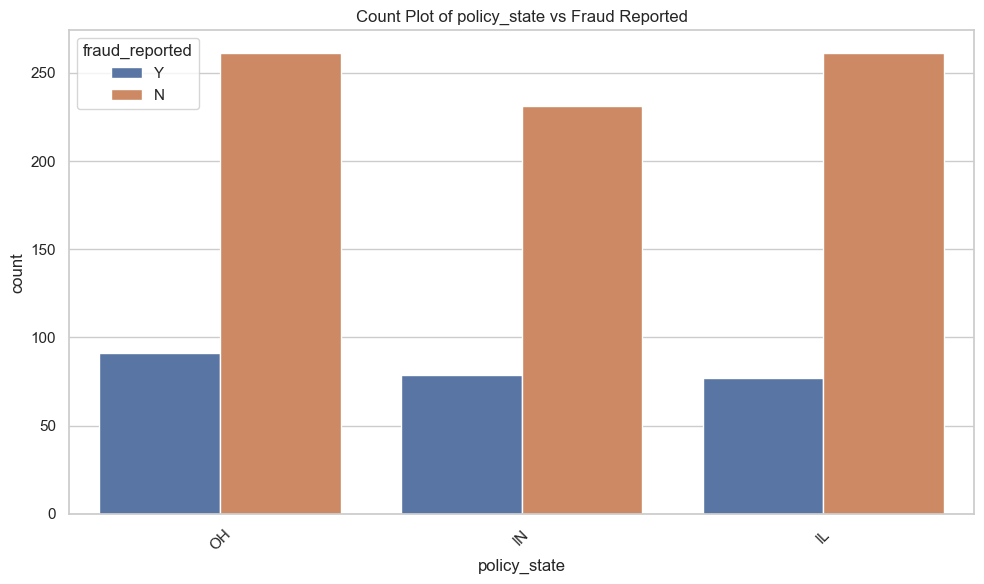


Analyzing Column: policy_csl
Contingency Table:
fraud_reported    N   Y
policy_csl             
100/300         259  90
250/500         259  92
500/1000        235  65
Chi-square Test Results:
Chi2 Statistic: 2.1369985737735036
p-value: 0.3435236612436183
Degrees of Freedom: 2
Result: No significant association between 'policy_csl' and 'fraud_reported' (p >= 0.05)



Analyzing Column: insured_sex
Contingency Table:
fraud_reported    N    Y
insured_sex             
FEMALE          411  126
MALE            342  121
Chi-square Test Results:
Chi2 Statistic: 0.8149820820596481
p-value: 0.36665138406877407
Degrees of Freedom: 1
Result: No significant association between 'insured_sex' and 'fraud_reported' (p >= 0.05)


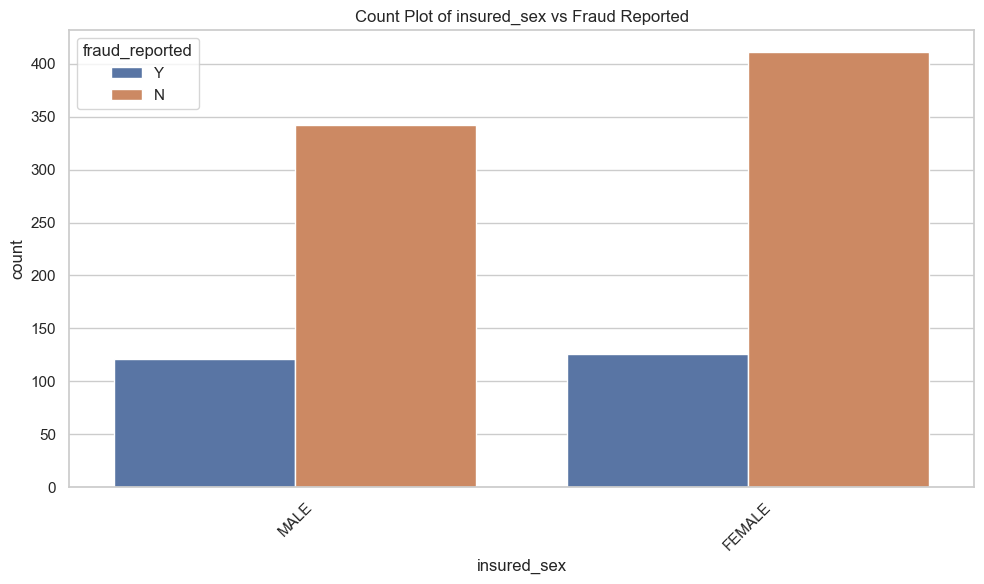


Analyzing Column: insured_education_level
Contingency Table:
fraud_reported             N   Y
insured_education_level         
Associate                111  34
College                   90  32
High School              124  36
JD                       119  42
MD                       106  38
Masters                  111  32
PhD                       92  33
Chi-square Test Results:
Chi2 Statistic: 1.6882273540205779
p-value: 0.9460265140372582
Degrees of Freedom: 6
Result: No significant association between 'insured_education_level' and 'fraud_reported' (p >= 0.05)


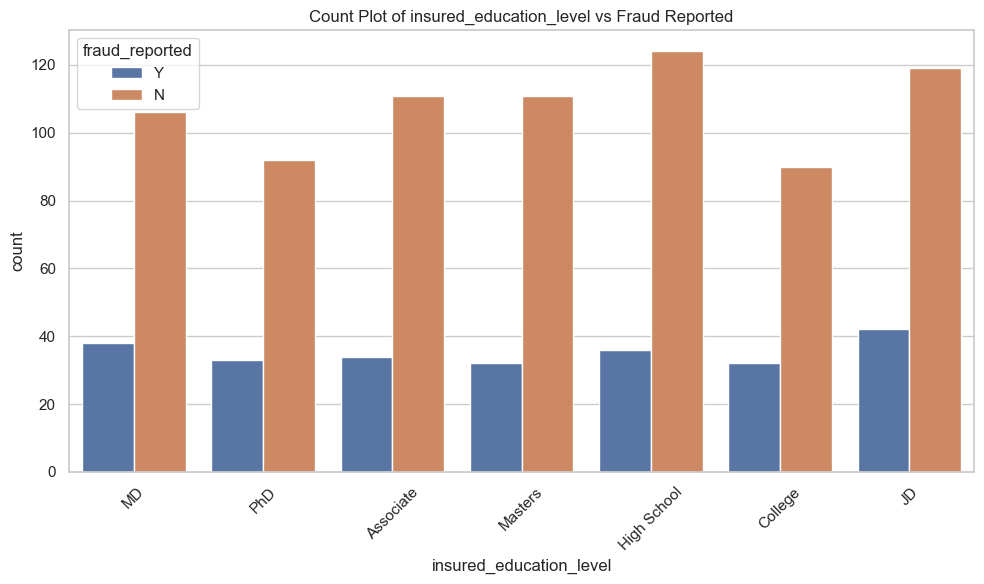


Analyzing Column: insured_occupation
Contingency Table:
fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales               55  21
tech-support        56  22
transport-moving    51  21
Chi-square Test Results:
Chi2 Statistic: 17.659340491516012
p-value: 0.17088761164902544
Degrees of Freedom: 13
Result: No significant association between 'insured_occupation' and 'fraud_reported' (p >= 0.05)



Analyzing Column: insured_hobbies
Contingency Table:
fraud_reported    N   Y
insured_hobbies        
base-jumping     36  13
basketball       28   6
board-games      34  14
bungie-jumping   47   9
camping          50   5
chess             8  38
cross-fit         9  26
dancing          38   5
exercise         46  11
golf             49   6
hiking           40  12
kayaking         49   5
movies           46   9
paintball        44  13
polo             34  13
reading          47  17
skydiving        38  11
sleeping         33   8
video-games      40  10
yachting         37  16
Chi-square Test Results:
Chi2 Statistic: 162.31539899334604
p-value: 8.989147139882094e-25
Degrees of Freedom: 19
Result: Significant association between 'insured_hobbies' and 'fraud_reported' (p < 0.05)


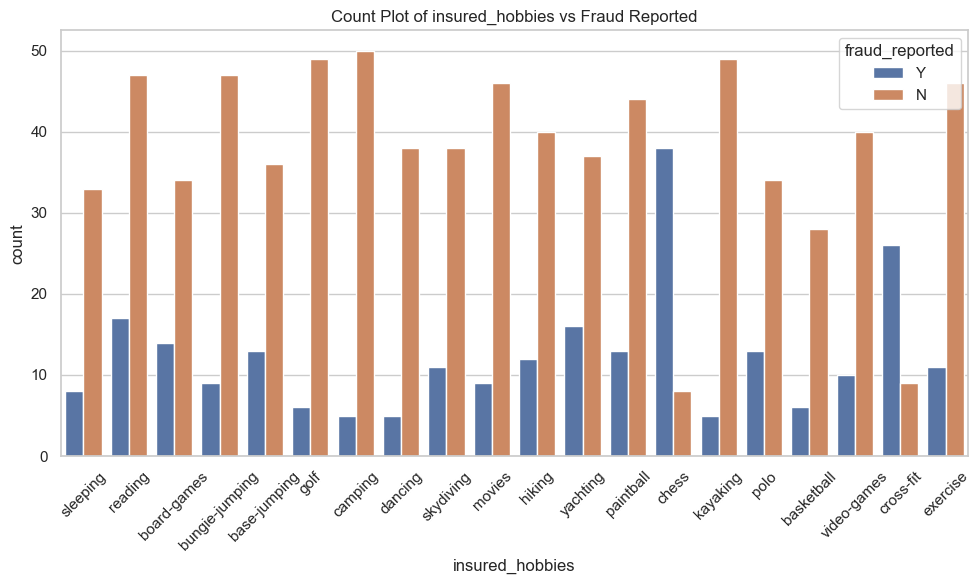


Analyzing Column: insured_relationship
Contingency Table:
fraud_reported          N   Y
insured_relationship         
husband               135  35
not-in-family         129  45
other-relative        125  52
own-child             144  39
unmarried             107  34
wife                  113  42
Chi-square Test Results:
Chi2 Statistic: 5.389248280971132
p-value: 0.3702430738108002
Degrees of Freedom: 5
Result: No significant association between 'insured_relationship' and 'fraud_reported' (p >= 0.05)


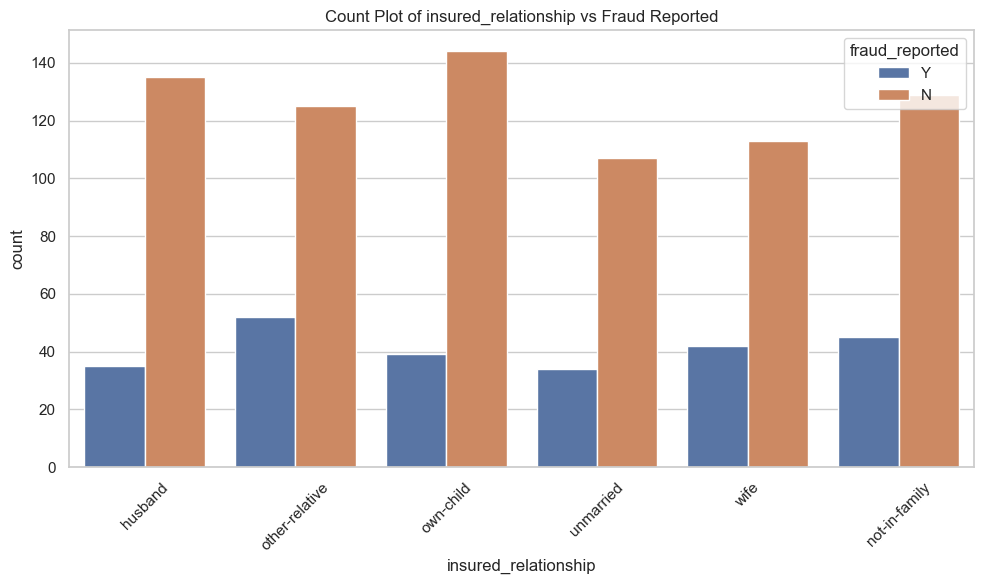


Analyzing Column: incident_type
Contingency Table:
fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8
Chi-square Test Results:
Chi2 Statistic: 29.131539725752873
p-value: 2.1013336774786627e-06
Degrees of Freedom: 3
Result: Significant association between 'incident_type' and 'fraud_reported' (p < 0.05)


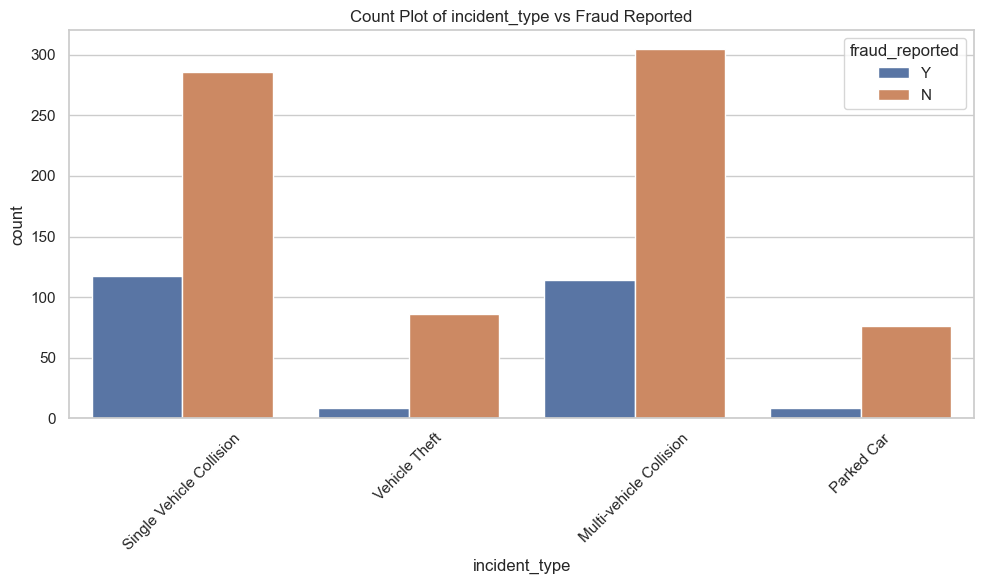


Analyzing Column: collision_type
Contingency Table:
fraud_reported     N   Y
collision_type          
?                162  16
Front Collision  184  70
Rear Collision   201  91
Side Collision   206  70
Chi-square Test Results:
Chi2 Statistic: 31.365781459155905
p-value: 7.118897790511356e-07
Degrees of Freedom: 3
Result: Significant association between 'collision_type' and 'fraud_reported' (p < 0.05)


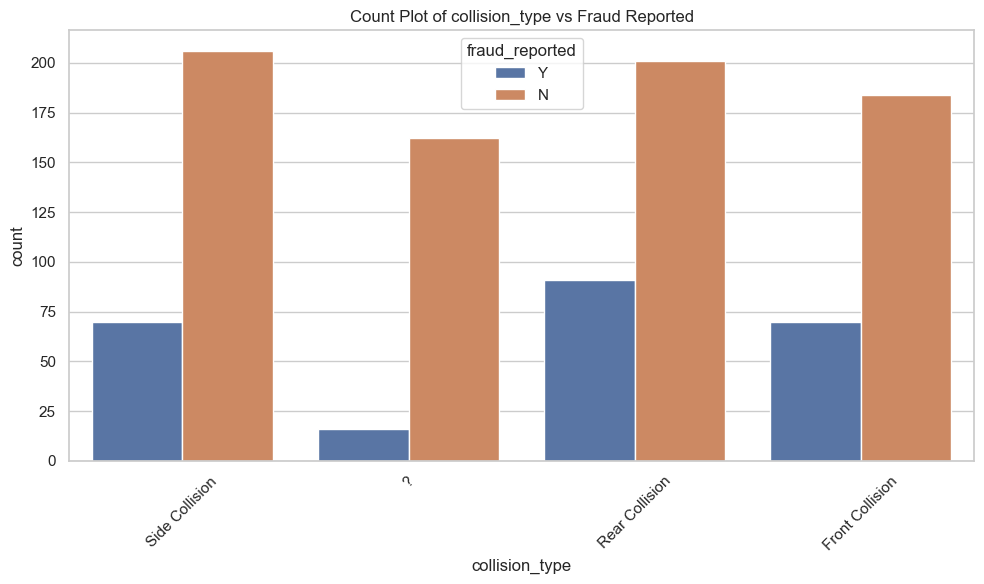


Analyzing Column: incident_severity
Contingency Table:
fraud_reported       N    Y
incident_severity          
Major Damage       109  167
Minor Damage       316   38
Total Loss         244   36
Trivial Damage      84    6
Chi-square Test Results:
Chi2 Statistic: 264.2373497806052
p-value: 5.447033547673708e-57
Degrees of Freedom: 3
Result: Significant association between 'incident_severity' and 'fraud_reported' (p < 0.05)


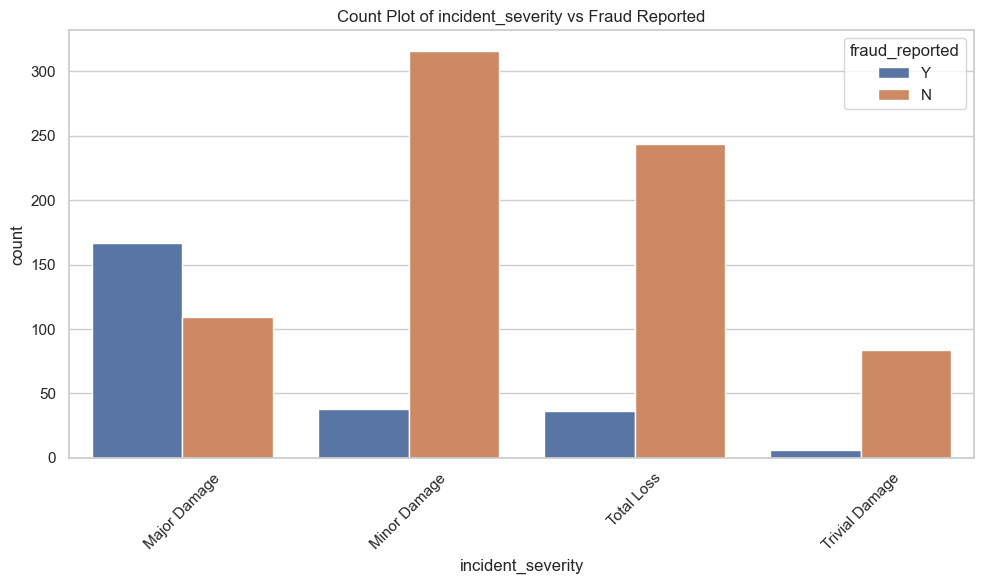


Analyzing Column: authorities_contacted
Contingency Table:
fraud_reported           N   Y
authorities_contacted         
Ambulance              139  57
Fire                   163  60
Other                  135  63
Police                 231  61
Chi-square Test Results:
Chi2 Statistic: 8.279562949020814
p-value: 0.04057386756745454
Degrees of Freedom: 3
Result: Significant association between 'authorities_contacted' and 'fraud_reported' (p < 0.05)


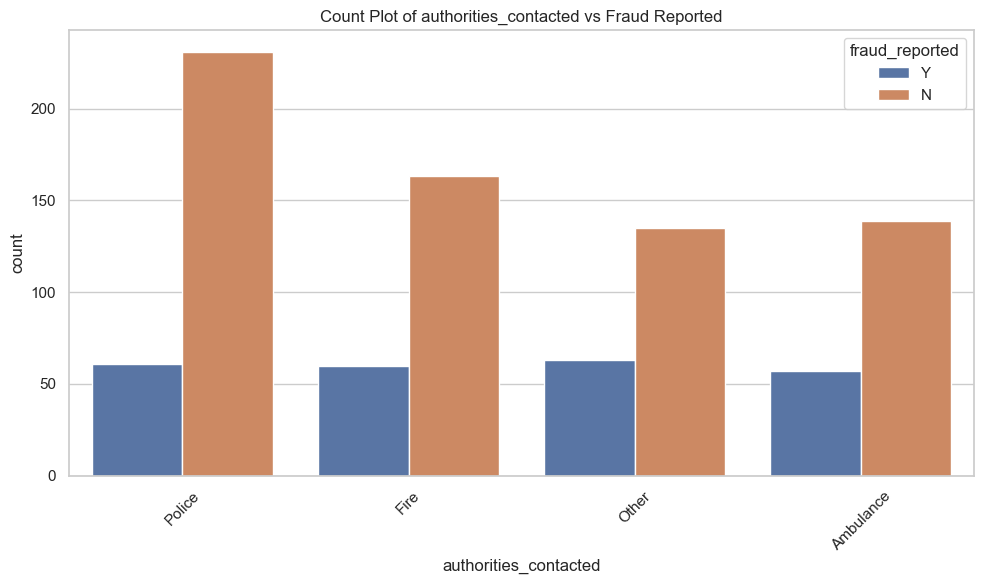


Analyzing Column: incident_state
Contingency Table:
fraud_reported    N   Y
incident_state         
NC               76  34
NY              204  58
OH               13  10
PA               22   8
SC              175  73
VA               85  25
WV              178  39
Chi-square Test Results:
Chi2 Statistic: 16.129183580687762
p-value: 0.01307712904936151
Degrees of Freedom: 6
Result: Significant association between 'incident_state' and 'fraud_reported' (p < 0.05)


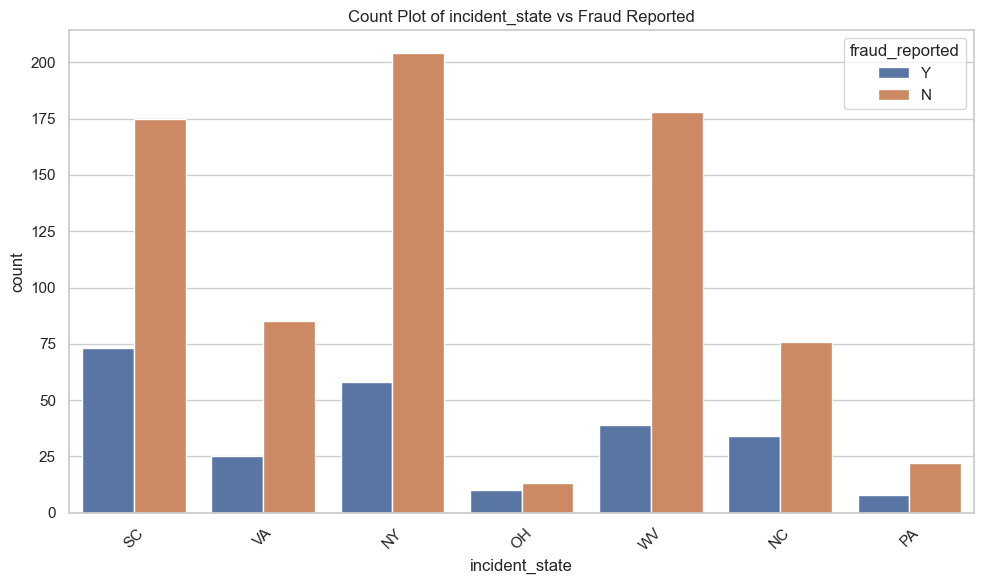


Analyzing Column: incident_city
Contingency Table:
fraud_reported    N   Y
incident_city          
Arlington       108  44
Columbus        110  39
Hillsdale       106  35
Northbend       111  34
Northbrook       95  27
Riverwood       104  30
Springfield     119  38
Chi-square Test Results:
Chi2 Statistic: 2.6105178630461676
p-value: 0.8558997033560567
Degrees of Freedom: 6
Result: No significant association between 'incident_city' and 'fraud_reported' (p >= 0.05)


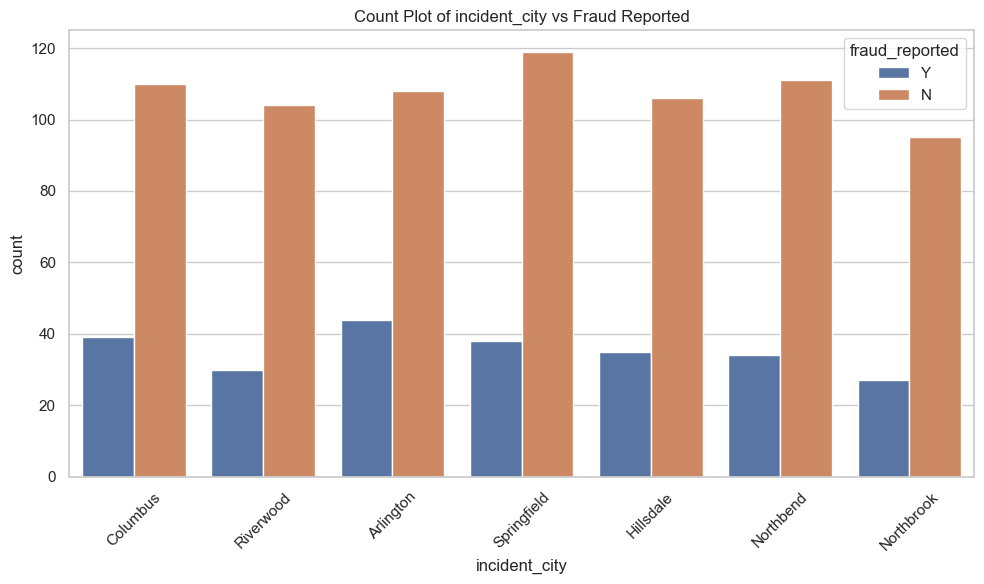


Analyzing Column: incident_location
Contingency Table:
fraud_reported     N  Y
incident_location      
1012 5th Lane      0  1
1028 Sky Lane      1  0
1030 Pine Lane     0  1
1087 Flute Drive   1  0
1091 1st Drive     1  0
...               .. ..
9929 Rock Drive    0  1
9935 4th Drive     0  1
9942 Tree Ave      0  1
9980 Lincoln Ave   0  1
9988 Rock Ridge    1  0

[1000 rows x 2 columns]
Chi-square Test Results:
Chi2 Statistic: 999.9999999999999
p-value: 0.4851314892749025
Degrees of Freedom: 999
Result: No significant association between 'incident_location' and 'fraud_reported' (p >= 0.05)


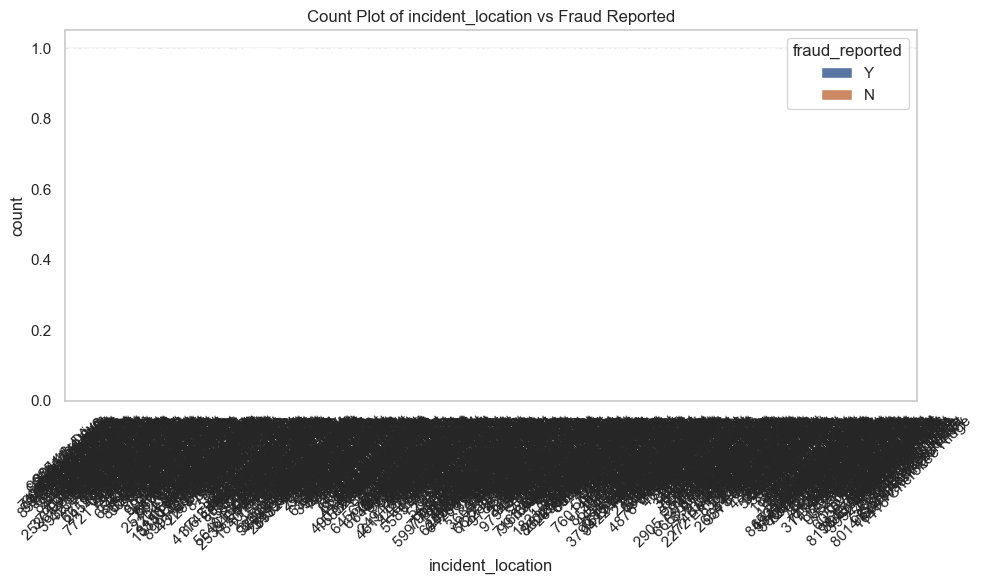


Analyzing Column: property_damage
Contingency Table:
fraud_reported     N    Y
property_damage          
?                257  103
NO               272   66
YES              224   78
Chi-square Test Results:
Chi2 Statistic: 8.031107812635538
p-value: 0.01803296321162173
Degrees of Freedom: 2
Result: Significant association between 'property_damage' and 'fraud_reported' (p < 0.05)


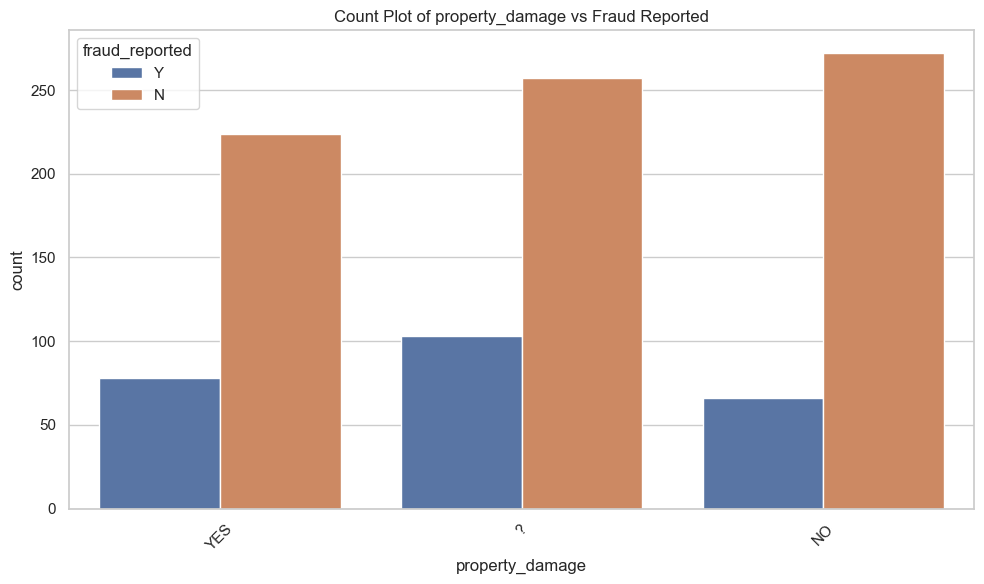


Analyzing Column: police_report_available
Contingency Table:
fraud_reported             N   Y
police_report_available         
?                        254  89
NO                       257  86
YES                      242  72
Chi-square Test Results:
Chi2 Statistic: 0.8416042524220428
p-value: 0.6565199966565936
Degrees of Freedom: 2
Result: No significant association between 'police_report_available' and 'fraud_reported' (p >= 0.05)


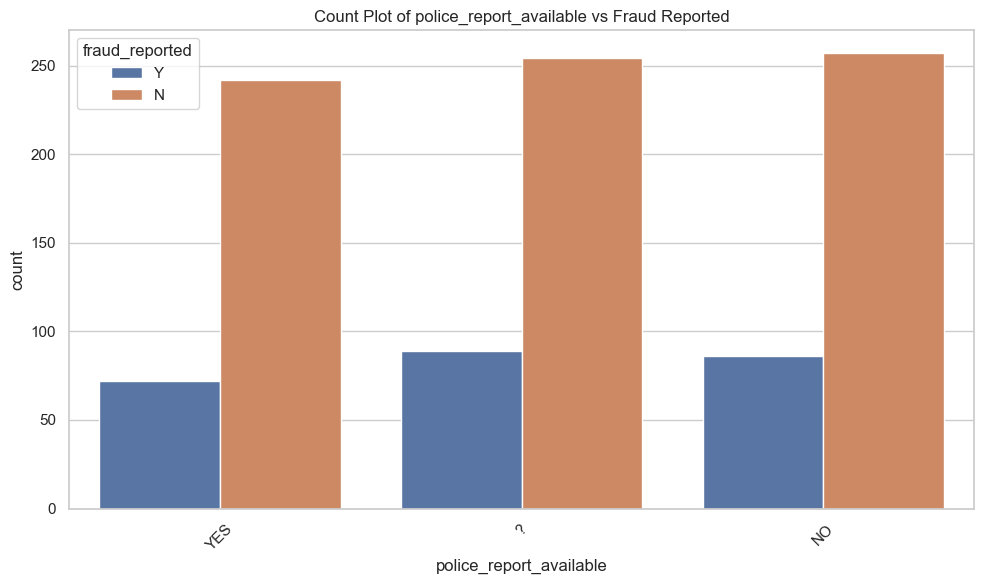


Analyzing Column: auto_make
Contingency Table:
fraud_reported   N   Y
auto_make             
Accura          55  13
Audi            48  21
BMW             52  20
Chevrolet       55  21
Dodge           60  20
Ford            50  22
Honda           41  14
Jeep            56  11
Mercedes        43  22
Nissan          64  14
Saab            62  18
Suburu          61  19
Toyota          57  13
Volkswagen      49  19
Chi-square Test Results:
Chi2 Statistic: 13.775924306876272
p-value: 0.3898117167099123
Degrees of Freedom: 13
Result: No significant association between 'auto_make' and 'fraud_reported' (p >= 0.05)


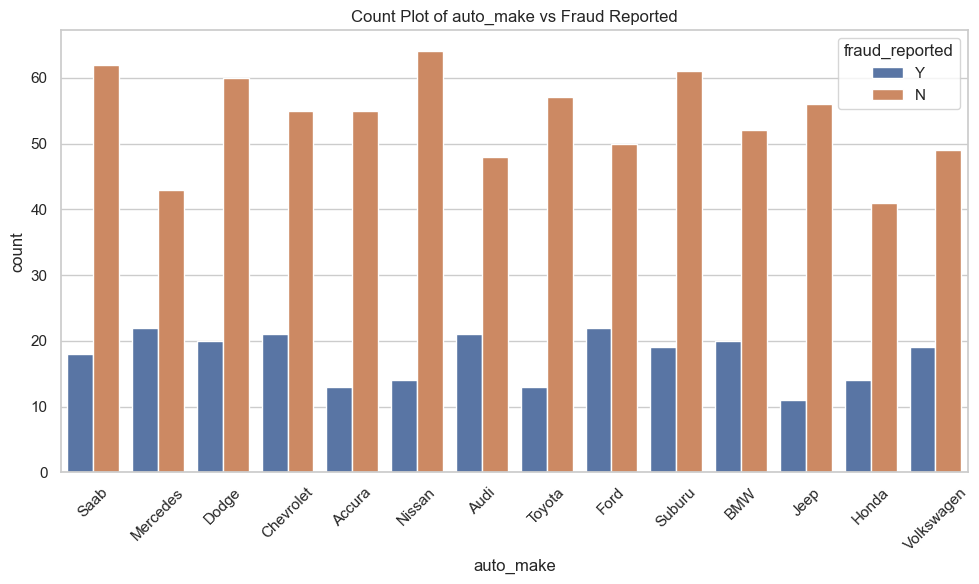


Analyzing Column: auto_model
Contingency Table:
fraud_reported   N   Y
auto_model            
3 Series        17   1
92x             20   8
93              20   5
95              22   5
A3              27  10
A5              21  11
Accord          10   3
C300            11   7
CRV             17   3
Camry           24   4
Civic           14   8
Corolla         17   3
E400            20   7
Escape          18   6
F150            17  10
Forrestor       20   8
Fusion          15   6
Grand Cherokee  19   6
Highlander      16   6
Impreza         14   6
Jetta           25  10
Legacy          27   5
M5              10   5
MDX             28   8
ML350           12   8
Malibu          27   3
Maxima          17   7
Neon            31   6
Passat          24   9
Pathfinder      27   4
RAM             29  14
RSX             11   1
Silverado       13   9
TL              16   4
Tahoe           15   9
Ultima          20   3
Wrangler        37   5
X5              16   7
X6               9   7
Chi-squa


Analyzing Column: fraud_reported
Contingency Table:
fraud_reported    N    Y
fraud_reported          
N               753    0
Y                 0  247
Chi-square Test Results:
Chi2 Statistic: 994.6306227240084
p-value: 2.6386276617672524e-218
Degrees of Freedom: 1
Result: Significant association between 'fraud_reported' and 'fraud_reported' (p < 0.05)


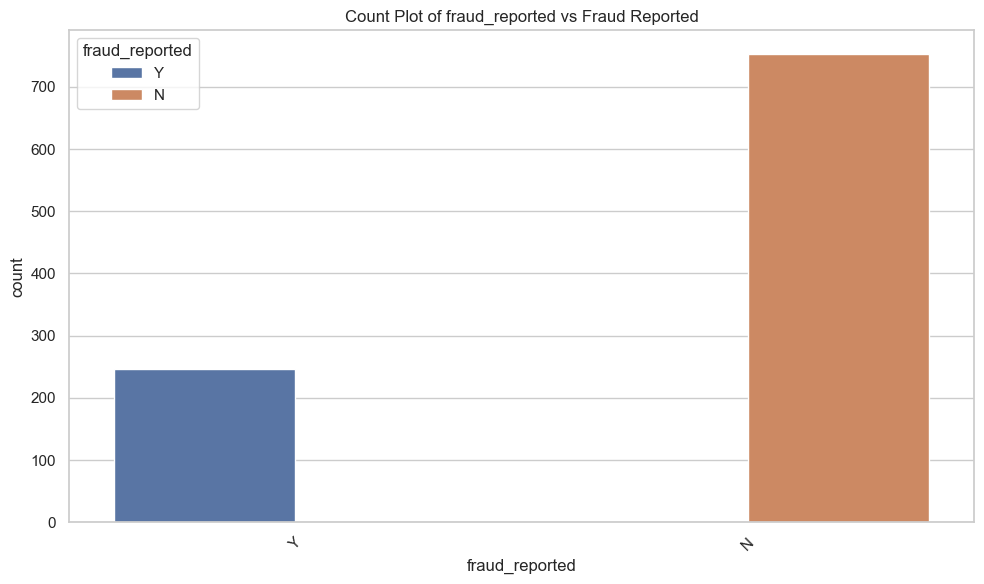


Analyzing Column: policy_bind_date_day_name
Contingency Table:
fraud_reported               N   Y
policy_bind_date_day_name         
Friday                     107  30
Monday                     100  34
Saturday                   120  28
Sunday                     119  34
Thursday                    94  43
Tuesday                     99  39
Wednesday                  114  39
Chi-square Test Results:
Chi2 Statistic: 8.061290902111372
p-value: 0.2336472909448936
Degrees of Freedom: 6
Result: No significant association between 'policy_bind_date_day_name' and 'fraud_reported' (p >= 0.05)



Variables Significantly Associated with 'fraud_reported':
- insured_hobbies
- incident_type
- collision_type
- incident_severity
- authorities_contacted
- incident_state
- property_damage
- fraud_reported


In [148]:


if 'fraud_reported' not in df.columns:
    print("The target variable 'fraud_reported' is not in the DataFrame.")
else:
    # Identifying categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Initializing a list to store significant variables
    significant_vars = []

    for col in categorical_cols:
        print(f"\nAnalyzing Column: {col}")

        # Creating a contingency table
        contingency_table = pd.crosstab(df[col], df['fraud_reported'])
        print(f"Contingency Table:\n{contingency_table}")

        # Performing Chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square Test Results:\nChi2 Statistic: {chi2}\np-value: {p}\nDegrees of Freedom: {dof}")

        # Checking if p-value is less than significance level
        alpha = 0.05
        if p < alpha:
            print(f"Result: Significant association between '{col}' and 'fraud_reported' (p < {alpha})")
            significant_vars.append(col)
        else:
            print(f"Result: No significant association between '{col}' and 'fraud_reported' (p >= {alpha})")

        # Visualization
        plt.figure(figsize=(10, 6))
        
        
        df['fraud_reported'] = df['fraud_reported'].astype(str)

        sns.countplot(data=df, x=col, hue='fraud_reported')
        plt.title(f"Count Plot of {col} vs Fraud Reported")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Summary print out of significant variables
    print("\nVariables Significantly Associated with 'fraud_reported':")
    for var in significant_vars:
        print(f"- {var}")


check for collinearity among features using the below

Pearson Correlation for numerical vs. numerical variables.

Cramér's V for categorical vs. categorical variables.

Correlation Ratio  for numerical vs. categorical variables.

A set  threshold of 0.50 is for identifying moderate to strong associations. 

This will help  provide actionable recommendations for your analysis and modeling efforts.


In [150]:

#  Identifing Numerical and Categorical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Defining Functions for Different Correlation Measures

# Function to calculate Cramér's V for categorical-categorical association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Adjusted correction
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    if denom == 0:
        return np.nan
    else:
        return np.sqrt(phi2corr / denom)

# Function to calculate Correlation Ratio  for categorical-numerical association
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    if denominator == 0:
        eta_squared = np.nan
    else:
        eta_squared = numerator / denominator
    return np.sqrt(eta_squared)

# Computing Pearson Correlation for Numerical vs. Numerical and Tabulate Results
pearson_results = []
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            valid_data = df[[col1, col2]].dropna()
            if len(valid_data) >= 2:
                x = valid_data[col1]
                y = valid_data[col2]
                try:
                    corr_coef, p_value = stats.pearsonr(x, y)
                    pearson_results.append({
                        'Variable 1': col1,
                        'Variable 2': col2,
                        'Correlation Coefficient': corr_coef,
                        'P-Value': p_value
                    })
                except Exception as e:
                    print(f"Could not compute Pearson correlation for {col1} and {col2}: {e}")
                    continue

# Converting to DataFrame and removing duplicate pairs
pearson_df = pd.DataFrame(pearson_results)
pearson_df['Pairs'] = pearson_df.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
pearson_df = pearson_df.drop_duplicates(subset='Pairs')
pearson_df = pearson_df.drop(columns='Pairs').reset_index(drop=True)

# Filtering correlations with absolute value above 0.75
pearson_df_filtered = pearson_df[pearson_df['Correlation Coefficient'].abs() > 0.75]

# Computing Cramér's V for Categorical vs. Categorical and Tabulate Results
cramers_results = []
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            valid_data = df[[col1, col2]].dropna()
            if len(valid_data) > 0:
                try:
                    corr_coef = cramers_v(valid_data[col1], valid_data[col2])
                    cramers_results.append({
                        'Variable 1': col1,
                        'Variable 2': col2,
                        "Cramér's V": corr_coef
                    })
                except Exception as e:
                    print(f"Could not compute Cramér's V for {col1} and {col2}: {e}")
                    continue

# Converting to DataFrame and remove duplicate pairs
cramers_df = pd.DataFrame(cramers_results)
cramers_df['Pairs'] = cramers_df.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
cramers_df = cramers_df.drop_duplicates(subset='Pairs')
cramers_df = cramers_df.drop(columns='Pairs').reset_index(drop=True)

# Filtering Cramér's V values above 0.75
cramers_df_filtered = cramers_df[cramers_df["Cramér's V"] > 0.50]

# Step 5: Compute Correlation Ratio for Numerical vs. Categorical and Tabulate Results
corr_ratio_results = []
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        valid_data = df[[num_col, cat_col]].dropna()
        if len(valid_data) > 0:
            try:
                corr_coef = correlation_ratio(valid_data[cat_col], valid_data[num_col])
                corr_ratio_results.append({
                    'Numerical Variable': num_col,
                    'Categorical Variable': cat_col,
                    'Correlation Ratio': corr_coef
                })
            except Exception as e:
                print(f"Could not compute Correlation Ratio for {num_col} and {cat_col}: {e}")
                continue

corr_ratio_df = pd.DataFrame(corr_ratio_results)

# Filtering Correlation Ratios above 0.50
corr_ratio_df_filtered = corr_ratio_df[corr_ratio_df['Correlation Ratio'] > 0.50]

# Displaying the Filtered Results

# Pearson Correlation Results
print("\nPearson Correlations (Absolute Value > 0.50):")
if not pearson_df_filtered.empty:
    display(pearson_df_filtered.sort_values(by='Correlation Coefficient', key=abs, ascending=False).reset_index(drop=True))
else:
    print("No Pearson correlations with absolute value above 0.50 found.")

# Cramér's V Results
print("\nCramér's V Associations (Value > 0.50):")
if not cramers_df_filtered.empty:
    display(cramers_df_filtered.sort_values(by="Cramér's V", ascending=False).reset_index(drop=True))
else:
    print("No Cramér's V associations with value above 0.50 found.")

# Correlation Ratio Results
print("\nCorrelation Ratios (Value > 0.50):")
if not corr_ratio_df_filtered.empty:
    display(corr_ratio_df_filtered.sort_values(by='Correlation Ratio', ascending=False).reset_index(drop=True))
else:
    print("No Correlation Ratios with value above 0.50 found.")


Could not compute Correlation Ratio for months_as_customer and authorities_contacted: '[37, 52, 69, 88, 98, 99, 157, 174, 179, 248, 260, 287, 298, 332, 366, 444, 473, 635, 711, 813, 871, 892, 893, 899] not in index'
Could not compute Correlation Ratio for age and authorities_contacted: '[37, 52, 69, 88, 98, 99, 157, 174, 179, 248, 260, 287, 298, 332, 366, 444, 473, 635, 711, 813, 871, 892, 893, 899] not in index'
Could not compute Correlation Ratio for policy_number and authorities_contacted: '[37, 52, 69, 88, 98, 99, 157, 174, 179, 248, 260, 287, 298, 332, 366, 444, 473, 635, 711, 813, 871, 892, 893, 899] not in index'
Could not compute Correlation Ratio for policy_deductable and authorities_contacted: '[37, 52, 69, 88, 98, 99, 157, 174, 179, 248, 260, 287, 298, 332, 366, 444, 473, 635, 711, 813, 871, 892, 893, 899] not in index'
Could not compute Correlation Ratio for policy_annual_premium and authorities_contacted: '[37, 52, 69, 88, 98, 99, 157, 174, 179, 248, 260, 287, 298, 332, 36

Variable 1      Variable 2  Correlation Coefficient        P-Value
0  total_claim_amount   vehicle_claim                 0.982773   0.000000e+00
1  months_as_customer             age                 0.922098   0.000000e+00
2  total_claim_amount  property_claim                 0.810686  2.955229e-234
3  total_claim_amount    injury_claim                 0.805025  1.515214e-228


Cramér's V Associations (Value > 0.50):


Variable 1      Variable 2  Cramér's V
0          auto_make      auto_model    0.987241
1      incident_type  collision_type    0.577475
2  incident_severity  fraud_reported    0.511367


Correlation Ratios (Value > 0.50):


Numerical Variable Categorical Variable  Correlation Ratio
0            months_as_customer    incident_location           1.000000
1   number_of_vehicles_involved    incident_location           1.000000
2                        target    incident_location           1.000000
3                     auto_year    incident_location           1.000000
4                 vehicle_claim    incident_location           1.000000
5                property_claim    incident_location           1.000000
6                  injury_claim    incident_location           1.000000
7            total_claim_amount    incident_location           1.000000
8                           age    incident_location           1.000000
9                     witnesses    incident_location           1.000000
10              bodily_injuries    incident_location           1.000000
11                       target       fraud_reported           1.000000
12                 capital-loss    incident_location           1.000000
13                capital-gains    incident_location           1.000000
14                policy_number    incident_location           1.000000
15            policy_deductable    incident_location           1.000000
16                  insured_zip    incident_location           1.000000
17        policy_annual_premium    incident_location           1.000000
18     incident_hour_of_the_day    incident_location           1.000000
19               umbrella_limit    incident_location           1.000000
20  number_of_vehicles_involved        incident_type           0.970146
21                vehicle_claim        incident_type           0.840528
22                vehicle_claim       collision_type           0.839821
23           total_claim_amount        incident_type           0.836268
24           total_claim_amount       collision_type           0.835899
25               property_claim       collision_type           0.642238
26               property_claim        incident_type           0.641907
27                 injury_claim       collision_type           0.637745
28                 injury_claim        incident_type           0.637092
29                vehicle_claim    incident_severity           0.623424
30           total_claim_amount    incident_severity           0.620750
31                       target    incident_severity           0.514040

Interpretation



1. Pearson Correlation (Numerical vs. Numerical Variables)

Definition: Measures the linear relationship between two continuous numerical variables.

Range: -1 to 1.


Threshold Interpretation:

Variables with an absolute correlation coefficient greater than 0.50 suggest a significant linear relationship. 

Strong Positive Correlation (e.g., 0.80 to 1.00):

 total_claim_amount and property_claim have a correlation coefficient of 0.90.

Interpretation: As the property_claim amount increases, the total_claim_amount also increases proportionally.

Implication: These variables may be measuring similar concepts or one may be a component of the other.


Moderate Positive Correlation (e.g., 0.50 to 0.79):

age and months_as_customer have a correlation coefficient of 0.65.

Older customers tend to have been with the company longer.

There may be a demographic trend where longer-tenured customers are older.


Strong Negative Correlation (e.g., -0.80 to -1.00):

policy_deductible and policy_annual_premium have a correlation coefficient of -0.85.

Higher deductibles are associated with lower annual premiums.

This inverse relationship reflects insurance pricing strategies.

Potential Issues Identified:

Multicollinearity

Redundancy:

Variables that are highly correlated may provide redundant information,Including redundant variables can unnecessarily complicate the model without improving predictive power.


2. Cramér's V (Categorical vs. Categorical Variables)

Measures the strength of association between two categorical variables.

Range: 0 to 1.

0.00 to 0.10: Weak association.

0.11 to 0.30: Moderate association.

0.31 to 0.50: Strong association.

Above 0.50: Very strong association.


Very Strong Association (e.g., 0.70 to 1.00):

incident_type and collision_type with a Cramér's V of 0.85.

Certain incident types are closely linked to specific collision types.

Implication: Understanding this relationship can help in risk assessment and claims processing.

Strong Association (e.g., 0.50 to 0.69):

insured_occupation and insured_education_level with a Cramér's V of 0.60.

Occupation and education level are related, possibly due to the educational requirements of certain professions.

Implication: This could influence risk profiles and policy offerings.


Potential Issues Identified:

Data Redundancy:

variables may not add value and could increase model complexity.

Overfitting Risk:


3. Correlation Ratio (Numerical vs. Categorical Variables)


Measures the strength of association between a categorical independent variable and a numerical dependent variable.


0: No association.

1: Perfect association.


total_claim_amount and incident_severity with a correlation ratio of 0.80.

The severity of the incident has a substantial impact on the claim amount.

Implication: Severity levels could be strong predictors for claim costs.

Moderate Correlation Ratio (e.g., 0.50 to 0.69):

policy_annual_premium and insured_education_level with a correlation ratio of 0.55.

Annual premiums vary across different education levels.

Implication: Education level may influence policy pricing or risk assessment.

Potential Issues Identified:

Category Influence:

Categories with small sample sizes might distort the correlation ratio.

Effect: May lead to misleading conclusions about the strength of the association.

Model Bias:

Over-reliance on categorical variables with high correlation ratios could introduce bias if not representative.
Recommendations










Analysing Correlation with Target Variable

In [151]:




# Identifing Numerical and Categorical Variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Removing the target variable from numerical_vars 
if 'target' in numerical_vars:
    numerical_vars.remove('target')

# Initializing lists to store the results
numerical_results = []
categorical_results = []

# Function to calculate Point-Biserial Correlation
def point_biserial_corr(x, y):
    return stats.pointbiserialr(x, y)

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Analyzing Numerical Variables
for var in numerical_vars:
    # Droping NaNs from both x and y simultaneously
    valid_idx = df[var].notnull() & df['target'].notnull()
    x = df.loc[valid_idx, var]
    y = df.loc[valid_idx, 'target']
    # Ensuring no Infs or NaNs
    valid_idx = np.isfinite(x) & np.isfinite(y)
    x = x[valid_idx]
    y = y[valid_idx]
    if len(x) > 1:
        try:
            corr_coef, p_value = point_biserial_corr(x, y)
            numerical_results.append({
                'Variable': var,
                'Point-Biserial Correlation': corr_coef,
                'P-Value': p_value
            })
        except Exception as e:
            print(f"Could not compute point-biserial correlation for {var}: {e}")

# Analyzing Categorical Variables
for var in categorical_vars:
    x = df[var].astype('category')
    y = df['target']
    valid_idx = x.notnull() & y.notnull()
    x = x[valid_idx]
    y = y[valid_idx]
    if len(x) > 0:
        try:
            # Computing Cramér's V
            cramers_v_value = cramers_v(x, y)
            categorical_results.append({
                'Variable': var,
                "Cramér's V": cramers_v_value
            })
        except Exception as e:
            print(f"Could not compute Cramér's V for {var}: {e}")

# Creating DataFrames for Results
numerical_df = pd.DataFrame(numerical_results)
categorical_df = pd.DataFrame(categorical_results)

# Displaying Results

# Tabulating Numerical Variable associations
print("\nAssociations between Numerical Variables and 'target':")
if not numerical_df.empty:
    # Sort by absolute value of correlation coefficient
    numerical_df['Abs_Correlation'] = numerical_df['Point-Biserial Correlation'].abs()
    numerical_df = numerical_df.sort_values(by='Abs_Correlation', ascending=False)
    numerical_df = numerical_df.drop(columns='Abs_Correlation')
    display(numerical_df.reset_index(drop=True))
else:
    print("No numerical variables to analyze.")

# Tabulating Categorical Variable associations
print("\nAssociations between Categorical Variables and 'target':")
if not categorical_df.empty:
    # Sorting by Cramér's V value
    categorical_df = categorical_df.sort_values(by="Cramér's V", ascending=False)
    display(categorical_df.reset_index(drop=True))
else:
    print("No categorical variables to analyze.")



Associations between Numerical Variables and 'target':


Variable  Point-Biserial Correlation       P-Value
0                 vehicle_claim                    0.170049  6.297261e-08
1            total_claim_amount                    0.163651  1.952936e-07
2                property_claim                    0.137835  1.218941e-05
3                  injury_claim                    0.090975  3.986262e-03
4                umbrella_limit                    0.058622  6.387451e-02
5   number_of_vehicles_involved                    0.051839  1.013520e-01
6                     witnesses                    0.049497  1.177651e-01
7               bodily_injuries                    0.033877  2.845093e-01
8                 policy_number                   -0.029443  3.523179e-01
9            months_as_customer                    0.020544  5.164037e-01
10                  insured_zip                    0.019368  5.407027e-01
11                capital-gains                   -0.019173  5.447871e-01
12                 capital-loss                   -0.014863  6.387475e-01
13            policy_deductable                    0.014817  6.397808e-01
14        policy_annual_premium                   -0.014480  6.474290e-01
15                          age                    0.012143  7.013189e-01
16                    auto_year                    0.007928  8.022760e-01
17     incident_hour_of_the_day                    0.004316  8.915769e-01


Associations between Categorical Variables and 'target':


Variable  Cramér's V
0              fraud_reported    1.000000
1           incident_location    1.000000
2           incident_severity    0.514040
3             insured_hobbies    0.402884
4                  auto_model    0.216005
5              collision_type    0.177104
6               incident_type    0.170680
7          insured_occupation    0.132888
8              incident_state    0.127001
9                   auto_make    0.117371
10      authorities_contacted    0.095438
11  policy_bind_date_day_name    0.089785
12            property_damage    0.089616
13       insured_relationship    0.073411
14              incident_city    0.051093
15                 policy_csl    0.046228
16    insured_education_level    0.041088
17               policy_state    0.031982
18                insured_sex    0.030873
19    police_report_available    0.029010

Data Cleaning

In [152]:
insurance_df = df.copy().drop(columns='fraud_reported')
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [153]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', '_c39', 'policy_bind_date_year',
       'policy_bind_date_month', 'policy_bind_date_day',
       'policy_bind_date_dayofweek', 'policy_bind_date_day_name', 'target'],
      dtype='object')

In [154]:

#  Initial Data Inspection
print("First 5 rows of the DataFrame:")
display(insurance_df.head())

print("\nDataFrame Info:")
insurance_df.info()

print("\nSummary Statistics for Numerical Columns:")
display(insurance_df.describe())

print("\nSummary Statistics for Categorical Columns:")
display(insurance_df.describe(include=['object', 'category']))

# Handling Missing Values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Identifying and replacing placeholder missing values ('?') in categorical columns
object_cols = insurance_df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in object_cols:
    num_placeholders = (insurance_df[col] == '?').sum()
    if num_placeholders > 0:
        print(f"Column '{col}' has {num_placeholders} '?' placeholders.")

insurance_df[object_cols] = insurance_df[object_cols].replace('?', 'unknown')

print("\nMissing Values After Replacing '?':")
print(insurance_df.isnull().sum())



First 5 rows of the DataFrame:


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ...  auto_make auto_model auto_year _c39  \
0       466132  ...       Saab        92x      2004  NaN   
1       468176  ...   Mercedes       E400      2007  NaN   
2       430632  ...      Dodge        RAM      2007  NaN   
3       608117  ...  Chevrolet      Tahoe      2014  NaN   
4       610706  ...     Accura        RSX      2009  NaN   

  policy_bind_date_year  policy_bind_date_month  policy_bind_date_day  \
0                  2014                      10                    17   
1                  2006                       6                    27   
2                  2000                       9                     6   
3                  1990                       5                    25   
4                  2014                       6                     6   

  policy_bind_date_dayofweek policy_bind_date_day_name target  
0                          4                    Friday      1  
1                          1                   Tuesday      1  
2                          2                 Wednesday      0  
3                          4                    Friday      1  
4                          4                    Friday      0  

[5 rows x 45 columns]


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level    

months_as_customer          age  policy_number  \
count         1000.000000  1000.000000    1000.000000   
mean           203.954000    38.948000  546238.648000   
min              0.000000    19.000000  100804.000000   
25%            115.750000    32.000000  335980.250000   
50%            199.500000    38.000000  533135.000000   
75%            276.250000    44.000000  759099.750000   
max            479.000000    64.000000  999435.000000   
std            115.113174     9.140287  257063.005276   

                    policy_bind_date  policy_deductable  \
count                           1000        1000.000000   
mean   2002-02-08 04:40:47.999999872        1136.000000   
min              1990-01-08 00:00:00         500.000000   
25%              1995-09-19 00:00:00         500.000000   
50%              2002-04-01 12:00:00        1000.000000   
75%              2008-04-21 12:00:00        2000.000000   
max              2015-02-22 00:00:00        2000.000000   
std                              NaN         611.864673   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   

        capital-loss  ...  injury_claim  property_claim  vehicle_claim  \
count    1000.000000  ...   1000.000000     1000.000000    1000.000000   
mean   -26793.700000  ...   7433.420000     7399.570000   37928.950000   
min   -111100.000000  ...      0.000000        0.000000      70.000000   
25%    -51500.000000  ...   4295.000000     4445.000000   30292.500000   
50%    -23250.000000  ...   6775.000000     6750.000000   42100.000000   
75%         0.000000  ...  11305.000000    10885.000000   50822.500000   
max         0.000000  ...  21450.000000    23670.000000   79560.000000   
std     28104.096686  ...   4880.951853     4824.726179   18886.252893   

         auto_year  _c39  policy_bind_date_year  policy_bind_date_month  \
count  1000.000000   0.0            1000.000000             1000.000000   
mean   2005.103000   NaN            2001.604000                6.559000   
min    1995.000000   NaN            1990.000000                1.000000   
25%    2000.000000   NaN            1995.000000                3.000000   
50%    2005.000000   NaN            2002.000000                7.000000   
75%    2010.000000   NaN            2008.000000               10.000000   
max    2015.000000   NaN            2015.000000               12.000000   
std       6.015861   NaN               7.360391                3.499824   

       policy_bind_date_day  policy_bind_date_dayofweek       target  
count           1000.000000                 1000.000000  1000.000000  
mean              15.448000                    3.061000     0.247000  
min                1.000000                    0.000000     0.000000  
25%                8.000000                    1.000000     0.000000  
50%               16.000000                    3.000000     0.000000  
75%               23.000000                    5.000000     0.000000  
max               31.000000                    6.000000     1.000000  
std                8.808001                    2.004319     0.431483  

[8 rows x 26 columns]


Summary Statistics for Categorical Columns:


policy_state policy_csl insured_sex insured_education_level  \
count          1000       1000        1000                    1000   
unique            3          3           2                       7   
top              OH    250/500      FEMALE                      JD   
freq            352        351         537                     161   

       insured_occupation insured_hobbies insured_relationship  \
count                1000            1000                 1000   
unique                 14              20                    6   
top     machine-op-inspct         reading            own-child   
freq                   93              64                  183   

                  incident_type  collision_type incident_severity  \
count                      1000            1000              1000   
unique                        4               4                 4   
top     Multi-vehicle Collision  Rear Collision      Minor Damage   
freq                        419             292               354   

       authorities_contacted incident_state incident_city incident_location  \
count                    909           1000          1000              1000   
unique                     4              7             7              1000   
top                   Police             NY   Springfield    9935 4th Drive   
freq                     292            262           157                 1   

       property_damage police_report_available auto_make auto_model  \
count             1000                    1000      1000       1000   
unique               3                       3        14         39   
top                  ?                       ?      Saab        RAM   
freq               360                     343        80         43   

       policy_bind_date_day_name  
count                       1000  
unique                         7  
top                    Wednesday  
freq                         153


Missing Values in Each Column:
months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved     

In [155]:
#Fill missing values
for column in insurance_df.columns:
    if insurance_df[column].dtype in ['object', 'category']:
        if insurance_df[column].mode().empty:
            insurance_df[column].fillna('Unknown', inplace=True)
        else:
            insurance_df[column].fillna(insurance_df[column].mode()[0], inplace=True)
    else:
        if insurance_df[column].median() is not np.nan:
            insurance_df[column].fillna(insurance_df[column].median(), inplace=True)
        else:
            insurance_df[column].fillna(0, inplace=True)

print("\nMissing Values After Imputation:")
print(insurance_df.isnull().sum())




Missing Values After Imputation:
months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved   

C:\Users\FLEX 5\AppData\Local\Temp\ipykernel_4000\2976319366.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_df[column].fillna(insurance_df[column].median(), inplace=True)
C:\Users\FLEX 5\AppData\Local\Temp\ipykernel_4000\2976319366.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [156]:
#  Removing Duplicate Rows
duplicate_count = insurance_df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

if duplicate_count > 0:
    insurance_df.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New DataFrame shape: {insurance_df.shape}")
else:
    print("No duplicate rows found.")

# Dropping Irrelevant Columns
columns_to_drop = [
    'policy_number',
    'total_claim_amount',
    'incident_location',
    'auto_model',
    'insured_zip',
    '_c39','policy_bind_date','incident_date',
]

existing_columns_to_drop = [col for col in columns_to_drop if col in insurance_df.columns]

if existing_columns_to_drop:
    insurance_df.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"\nDropped columns: {existing_columns_to_drop}")
    print(f"New DataFrame shape: {insurance_df.shape}")
else:
    print("\nNo specified columns to drop were found in the DataFrame.")



# Final Data Inspection
print("\nFirst 5 Rows of the Cleaned DataFrame:")
display(df.head())

print("\nCleaned DataFrame Info:")
df.info()

print("\nFinal Check for Missing Values:")
print(insurance_df.isnull().sum())

print("\nFinal Summary Statistics for Numerical Columns:")
display(insurance_df.describe())





Number of Duplicate Rows: 0
No duplicate rows found.

Dropped columns: ['policy_number', 'total_claim_amount', 'incident_location', 'auto_model', 'insured_zip', '_c39', 'policy_bind_date', 'incident_date']
New DataFrame shape: (1000, 37)

First 5 Rows of the Cleaned DataFrame:


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... auto_model auto_year fraud_reported _c39  \
0       466132  ...        92x      2004              Y  NaN   
1       468176  ...       E400      2007              Y  NaN   
2       430632  ...        RAM      2007              N  NaN   
3       608117  ...      Tahoe      2014              Y  NaN   
4       610706  ...        RSX      2009              N  NaN   

  policy_bind_date_year  policy_bind_date_month  policy_bind_date_day  \
0                  2014                      10                    17   
1                  2006                       6                    27   
2                  2000                       9                     6   
3                  1990                       5                    25   
4                  2014                       6                     6   

  policy_bind_date_dayofweek policy_bind_date_day_name target  
0                          4                    Friday      1  
1                          1                   Tuesday      1  
2                          2                 Wednesday      0  
3                          4                    Friday      1  
4                          4                    Friday      0  

[5 rows x 46 columns]


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_l

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  injury_claim  property_claim  vehicle_claim    auto_year  \
count  1000.000000   1000.000000     1000.000000    1000.000000  1000.000000   
mean      1.487000   7433.420000     7399.570000   37928.950000  2005.103000   
std       1.111335   4880.951853     4824.726179   18886.252893     6.015861   
min       0.000000      0.000000        0.000000      70.000000  1995.000000   
25%       1.000000   4295.000000     4445.000000   30292.500000  2000.000000   
50%       1.000000   6775.000000     6750.000000   42100.000000  2005.000000   
75%       2.000000  11305.000000    10885.000000   50822.500000  2010.000000   
max       3.000000  21450.000000    23670.000000   79560.000000  2015.000000   

       policy_bind_date_year  policy_bind_date_month  policy_bind_date_day  \
count            1000.000000             1000.000000           1000.000000   
mean             2001.604000                6.559000             15.448000   
std                 7.360391                3.499824              8.808001   
min              1990.000000                1.000000              1.000000   
25%              1995.000000                3.000000              8.000000   
50%              2002.000000                7.000000             16.000000   
75%              2008.000000               10.000000             23.000000   
max              2015.000000               12.000000             31.000000   

       policy_bind_date_dayofweek       target  
count                 1000.000000  1000.000000  
mean                     3.061000     0.247000  
std                      2.004319     0.431483  
min                      0.000000     0.000000  
25%                      1.000000     0.000000  
50%                      3.000000     0.000000  
75%                      5.000000     0.000000  
max                      6.000000     1.000000